In [19]:
"""
###################### COVID-19 Community Measures ######################
#################### Supervised Learning - Regression ###################


### Authors
João Araújo, 201705577
Jorge Pacheco, 201705754
Leonor Sousa, 201705377

### Context
Artifial Inteligence curricular unit
3rd year of the Integrated Master of Informatic and Computing Engineering

### Responsible Professors
Prof. Luís Paulo Gonçalves dos Reis
Prof. Henrique Daniel de Avelar Lopes Cardoso


### Abstract
In this project you will find an artifial inteligence study over the COVID-19 Community Mobility Reports.
We use supervised learning algorithms to do a regression of our dataset, in order to be able to analise the relation between the variation of certain community activities and the evolution of COVID-19.


### Introduction

In a world strongly affected by the COVID-19 outbreak and that is slowing recovering from it, it is crutial to analise the effect the suspension/maintenance of some measures might have on the evolution of the virus.
Having this in mind, we will use artificial inteligence algorithms in order to predict how the activity variation in certain areas affect the number of cases and fatalities due to COVID-19.

We will study 6 different areas of activity:
1. Retail & recreation: places like restaurants, cafes, shopping centers, theme parks, museums, libraries, and movie theaters.
2. Grocery & pharmacy: places like grocery markets, food warehouses, farmers markets, specialty food shops, drug stores, and pharmacies.
3. Parks: Mobility trends for places like national parks, public beaches, marinas, dog parks, plazas, and public gardens.
4. Transit stations: places like public transport hubs such as subway, bus, and train stations.
5. Workplaces: places of work.
6. Residential: places of residence.

The dataset we are using is provided by Kaggle (https://www.kaggle.com/gustavomodelli/covid-community-measures).

"""

'\n###################### COVID-19 Community Measures ######################\n#################### Supervised Learning - Regression ###################\n\n\n### Authors\nJoão Araújo, 201705577\nJorge Pacheco, 201705754\nLeonor Sousa, 201705377\n\n### Context\nArtifial Inteligence curricular unit\n3rd year of the Integrated Master of Informatic and Computing Engineering\n\n### Responsible Professors\nProf. Luís Paulo Gonçalves dos Reis\nProf. Henrique Daniel de Avelar Lopes Cardoso\n\n\n### Abstract\nIn this project you will find an artifial inteligence study over the COVID-19 Community Mobility Reports.\nWe use supervised learning algorithms to do a regression of our dataset, in order to be able to analise the relation between the variation of certain community activities and the evolution of COVID-19.\n\n\n### Introduction\n\nIn a world strongly affected by the COVID-19 outbreak and that is slowing recovering from it, it is crutial to analise the effect the suspension/maintenance of s

In [20]:
# all the imports necessary for the code to run
import pandas as pd
from datetime import datetime
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model, svm
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt  
import numpy as np

In [21]:
# extracting data from dataset file
data = pd.read_csv('dataset.csv')
data_array = data.values

In [22]:
"""
### Description of the Problem/Datasets

The dataset has collumns for the following information:
1. Geographic Area where the data from the following collumns was obtained - Includes columns country_symbol and country.
2. Date of the remaining data - Column date.
3. Percent change from baseline for each of the activies - Includes columns grocery_and_pharmacy, parks, residential, retail_and_recreation, transit_stations, workplaces.
4. COVID-19 data - Includes columns total_cases and fatalities.

Note: We are doing a international study, so columns regarding geographic area will not be used.

With the described dataset we intend to predict the total_cases and fatalaties regarding COVID-19, considering the variation of activity in the different types of studied places.
"""

'\n### Description of the Problem/Datasets\n\nThe dataset has collumns for the following information:\n1. Geographic Area where the data from the following collumns was obtained - Includes columns country_symbol and country.\n2. Date of the remaining data - Column date.\n3. Percent change from baseline for each of the activies - Includes columns grocery_and_pharmacy, parks, residential, retail_and_recreation, transit_stations, workplaces.\n4. COVID-19 data - Includes columns total_cases and fatalities.\n\nNote: We are doing a international study, so columns regarding geographic area will not be used.\n\nWith the described dataset we intend to predict the total_cases and fatalaties regarding COVID-19, considering the variation of activity in the different types of studied places.\n'

In [23]:
# printing the original data in table format
data

,iso,country,date,grocery_pharmacy,parks,residential,retail_recreation,transit_stations,workplaces,total_cases,fatalities
0,AR,Argentina,2020-02-23,8.185,17.563,0.437,13.644,5.334,-2.486,0,0
1,AR,Argentina,2020-02-24,-15.875,25.605,6.321,-9.973,-26.785,-53.687,0,0
2,AR,Argentina,2020-02-25,-17.135,1.325,6.895,-19.717,-28.485,-50.053,0,0
3,AR,Argentina,2020-02-26,2.304,5.399,-2.273,0.845,9.461,12.584,0,0
4,AR,Argentina,2020-02-27,-0.404,-5.267,-0.493,-0.584,7.983,12.407,0,0
...,...,...,...,...,...,...,...,...,...,...,...
812,ZA,South Africa,2020-04-01,-42.446,-37.600,34.916,-69.728,-77.371,-72.935,1380,5
813,ZA,South Africa,2020-04-02,-40.523,-38.226,36.550,-69.577,-77.874,-73.331,1462,5
814,ZA,South Africa,2020-04-03,-42.107,-43.271,38.379,-71.513,-77.944,-72.745,1505,9
815,ZA,South Africa,2020-04-04,-51.515,-57.252,26.499,-76.589,-77.026,-55.095,1585,9


In [24]:
# dividing our columns into different arrays to prepare them for the algorithms
grocery = data['grocery_pharmacy'].values
parks = data['parks'].values
residential = data['residential'].values
retail = data['retail_recreation'].values
transit = data['transit_stations'].values
work = data['workplaces'].values
cases = data['total_cases'].values
deaths = data['fatalities'].values

In [25]:
# The next 5 sets of instructions is for pre-processing but is not being used at the moment
labelencoder_X = LabelEncoder()
start_date=datetime.strptime(min(data.iloc[:,2]),"%Y-%m-%d")
independent_data=data.iloc[:,0:1].values
dates=data.iloc[:,2].values
new_dates=[]
dependant_data=data.iloc[:,9:].values

for row in data.iloc[:,2].values: #calculates diff of dates in days
  new_dates.append((datetime.strptime(row,"%Y-%m-%d")-start_date).days)

In [26]:
# independent_data[:,0] = labelencoder_X.fit_transform(independent_data[:,0])
independent_data = OneHotEncoder().fit_transform(independent_data).toarray()
independent_data = np.append(independent_data,np.array(new_dates)[:, None],axis=1) #append dates
independent_data = np.append(independent_data,data.iloc[:,3:9].values,axis=1)
independent_data

array([[  1.   ,   0.   ,   0.   , ...,  13.644,   5.334,  -2.486],
       [  1.   ,   0.   ,   0.   , ...,  -9.973, -26.785, -53.687],
       [  1.   ,   0.   ,   0.   , ..., -19.717, -28.485, -50.053],
       ...,
       [  0.   ,   0.   ,   0.   , ..., -71.513, -77.944, -72.745],
       [  0.   ,   0.   ,   0.   , ..., -76.589, -77.026, -55.095],
       [  0.   ,   0.   ,   0.   , ..., -75.913, -78.001, -44.329]])

In [27]:
#Changing data to cumulative values

new_grocery=[]
new_parks=[]
new_residential=[]
new_retail=[]
new_transit=[]
new_work=[]
new_cases=[]
new_deaths=[]

for i in range(len(grocery)): 
  if (i%43==0):
    new_grocery.append((grocery[i]*0.01+1)*100)
    new_parks.append((parks[i]*0.01+1)*100)
    new_residential.append((residential[i]*0.01+1)*100)
    new_retail.append((retail[i]*0.01+1)*100)
    new_transit.append((transit[i]*0.01+1)*100)
    new_work.append((work[i]*0.01+1)*100)
    new_cases.append(cases[i])
    new_deaths.append(deaths[i])
  else:
    new_grocery.append((grocery[i]*0.01+1)*new_grocery[-1])
    new_parks.append((parks[i]*0.01+1)*new_parks[-1])
    new_residential.append((residential[i]*0.01+1)*new_residential[-1])
    new_retail.append((retail[i]*0.01+1)*new_retail[-1])
    new_transit.append((transit[i]*0.01+1)*new_transit[-1])
    new_work.append((work[i]*0.01+1)*new_work[-1])
    new_cases.append(cases[i]-cases[i-1])
    new_deaths.append(deaths[i]-deaths[i-1])

In [28]:
#transform to array
new_grocery=np.array(new_grocery).reshape(-1,1)
new_parks=np.array(new_parks).reshape(-1,1)
new_residential=np.array(new_residential).reshape(-1,1)
new_retail=np.array(new_retail).reshape(-1,1)
new_transit=np.array(new_transit).reshape(-1,1)
new_work=np.array(new_work).reshape(-1,1)
new_cases=np.array(new_cases).reshape(-1,1)
new_deaths=np.array(new_deaths).reshape(-1,1)
grocery=grocery.reshape(-1,1)
parks=parks.reshape(-1,1)
residential=residential.reshape(-1,1)
retail=retail.reshape(-1,1)
transit=transit.reshape(-1,1)
work=work.reshape(-1,1)
cases=cases.reshape(-1,1)
deaths=deaths.reshape(-1,1)

In [29]:
# Split the data into training and testing
X_grocery_train, X_grocery_test = train_test_split(grocery, test_size=0.2, random_state=0)
X_parks_train, X_parks_test = train_test_split(parks, test_size=0.2, random_state=0)
X_residential_train, X_residential_test = train_test_split(residential, test_size=0.2, random_state=0)
X_retail_train, X_retail_test = train_test_split(retail, test_size=0.2, random_state=0)
X_transit_train, X_transit_test = train_test_split(transit, test_size=0.2, random_state=0)
X_work_train, X_work_test = train_test_split(work, test_size=0.2, random_state=0)
y_cases_train, y_cases_test = train_test_split(new_cases, test_size=0.2, random_state=0)
y_deaths_train, y_deaths_test = train_test_split(new_deaths, test_size=0.2, random_state=0)

In [30]:
#join all activities
training=(X_grocery_train, X_parks_train, X_residential_train,X_retail_train,X_transit_train,X_work_train)
training = np.hstack(training)
test=(X_grocery_test,X_parks_test,X_residential_test,X_retail_test,X_transit_test,X_work_test)
test = np.hstack(test)

In [31]:
"""
### Approach

In order to do our study, we will use 3 different types of regression/supervised learning algorithms: linear regression, decision trees and support vector machines.

We will used the implementation of these algorithms that are available in the scikit library.

For our X value will use the different collumns that represent the types of activity. In the final experiment, we will used all of these columns together as X. As for our y we will use the two different collumns that represent total_cases and fatalities. Once again in the experiment we will use both collumns together as y.

"""

'\n### Approach\n\nIn order to do our study, we will use 3 different types of regression/supervised learning algorithms: linear regression, decision trees and support vector machines.\n\nWe will used the implementation of these algorithms that are available in the scikit library.\n\nFor our X value will use the different collumns that represent the types of activity. In the final experiment, we will used all of these columns together as X. As for our y we will use the two different collumns that represent total_cases and fatalities. Once again in the experiment we will use both collumns together as y.\n\n'

In [32]:
"""
### Experimental Evaluation

Note: in the following code you will find the implementation of the approach and the results of the experiments.
"""

'\n### Experimental Evaluation\n\nNote: in the following code you will find the implementation of the approach and the results of the experiments.\n'

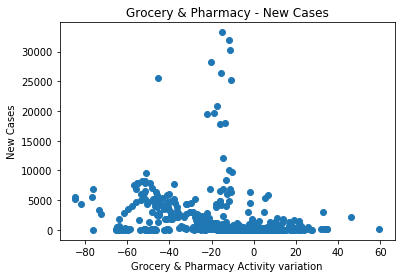

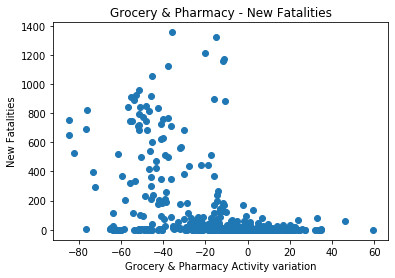

In [33]:
################# Grocery Analysis #####################

# show data regarding pharmacy vs Cases
plt.plot(grocery,new_cases,'o')
plt.title('Grocery & Pharmacy - New Cases')  
plt.xlabel('Grocery & Pharmacy Activity variation')  
plt.ylabel('New Cases')  
plt.show()

# show data regarding pharmacy vs Deaths
plt.plot(grocery,new_deaths,'o')
plt.title('Grocery & Pharmacy - New Fatalities')  
plt.xlabel('Grocery & Pharmacy Activity variation')  
plt.ylabel('New Fatalities')  
plt.show()

In [34]:
### Linear Regression


linear_regressor = LinearRegression()  

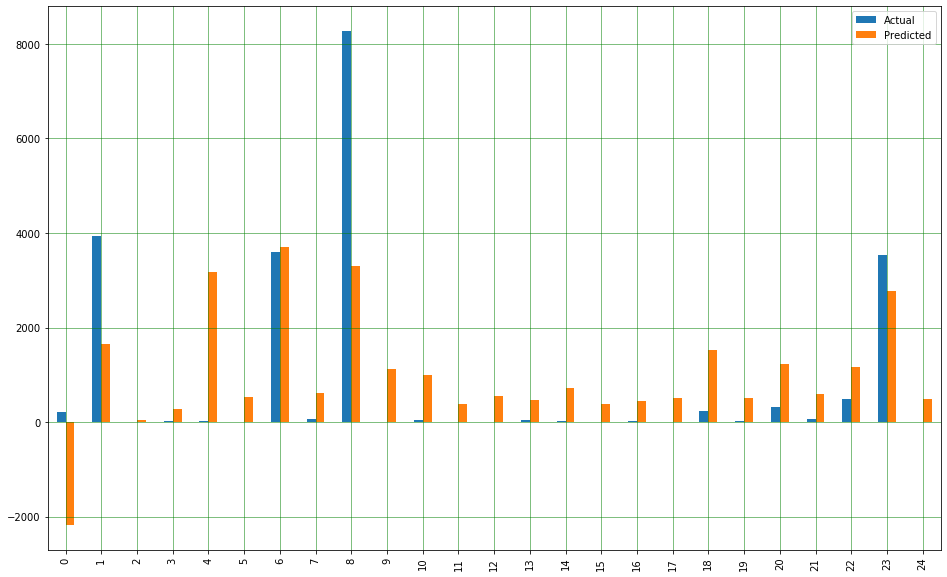

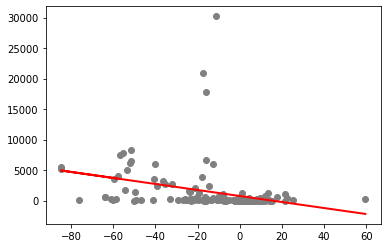

In [35]:
## Grocery vs Cases
linear_regressor.fit(X_grocery_train, y_cases_train) #training the algorithm
grocery_cases_pred = linear_regressor.predict(X_grocery_test)

# Table showing actual vs predicted values
df = pd.DataFrame({'Actual': y_cases_test.flatten(), 'Predicted': grocery_cases_pred.flatten()})
df

# Graphic showing actual vs predicted values
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# Graphic showing result of the linear regression
plt.scatter(X_grocery_test, y_cases_test,  color='gray')
plt.plot(X_grocery_test, grocery_cases_pred, color='red', linewidth=2)
plt.show()

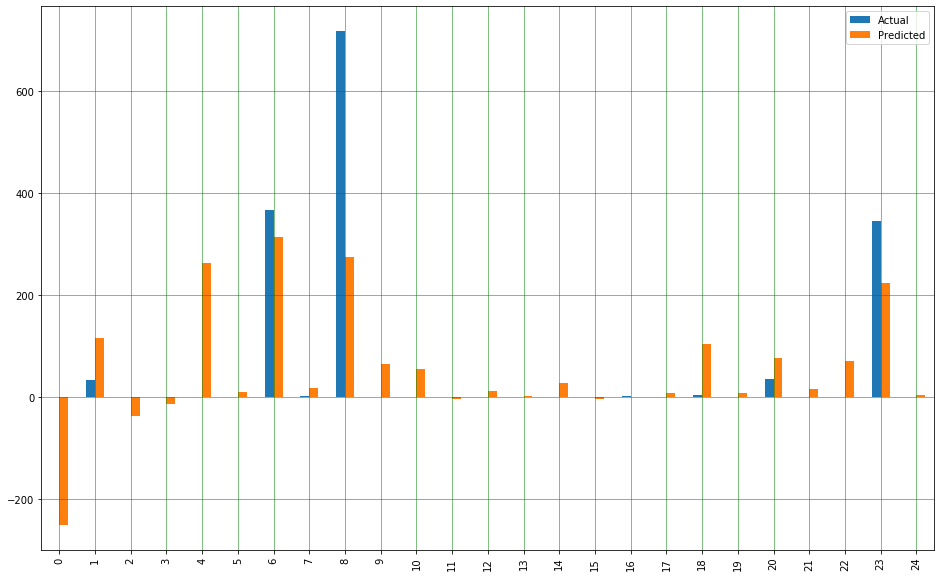

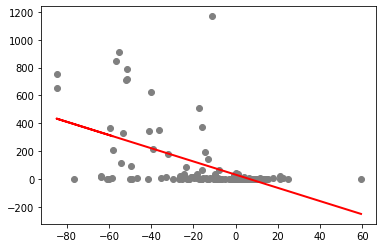

In [36]:
## Grocery vs Deaths
linear_regressor.fit(X_grocery_train, y_deaths_train) #training the algorithm
grocery_deaths_pred = linear_regressor.predict(X_grocery_test)

# Table showing actual vs predicted values
df = pd.DataFrame({'Actual': y_deaths_test.flatten(), 'Predicted': grocery_deaths_pred.flatten()})
df

# Graphic showing actual vs predicted values
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# Graphic showing result of the linear regression
plt.scatter(X_grocery_test, y_deaths_test,  color='gray')
plt.plot(X_grocery_test, grocery_deaths_pred, color='red', linewidth=2)
plt.show()

In [37]:
### Decision Tree

# Fit regression model
decision_tree_regressor = DecisionTreeRegressor(max_depth=5)

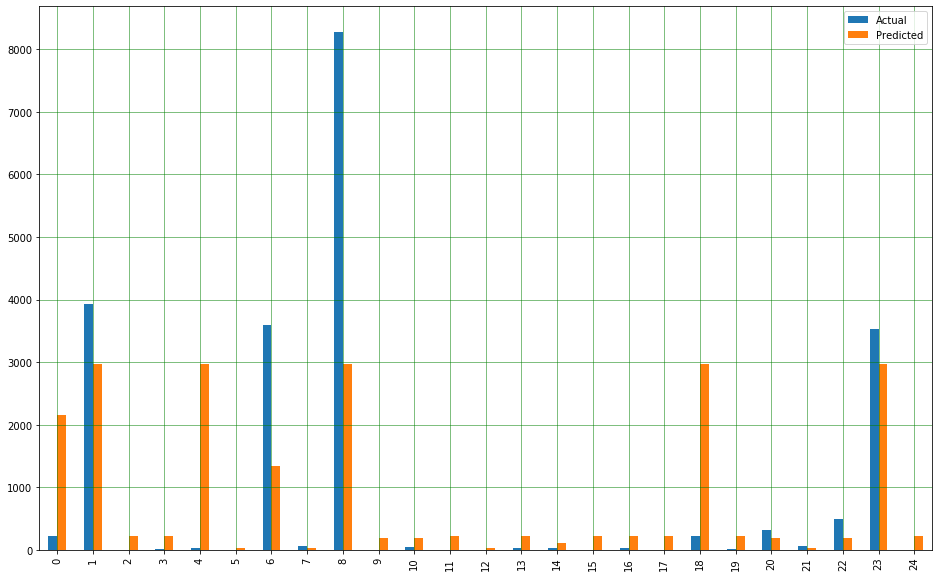

In [38]:
## Grocery vs Cases
decision_tree_regressor.fit(X_grocery_train, y_cases_train)
grocery_cases_pred = decision_tree_regressor.predict(X_grocery_test)

# Table showing actual vs predicted values
df = pd.DataFrame({'Actual': y_cases_test.flatten(), 'Predicted': grocery_cases_pred.flatten()})
df

# Graphic showing actual vs predicted values
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

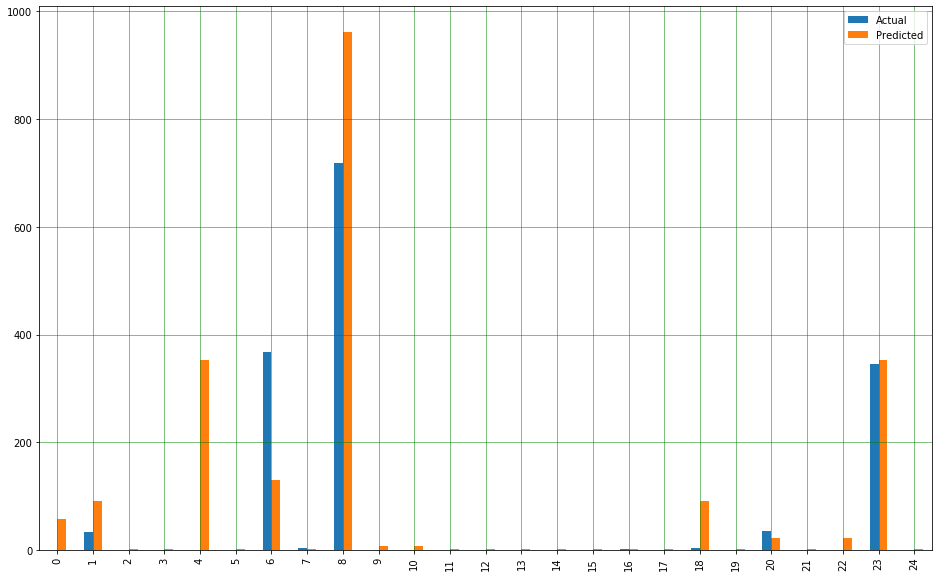

In [39]:
## Grocery vs Deaths
decision_tree_regressor.fit(X_grocery_train, y_deaths_train)
grocery_deaths_pred = decision_tree_regressor.predict(X_grocery_test)

# Table showing actual vs predicted values
df = pd.DataFrame({'Actual': y_deaths_test.flatten(), 'Predicted': grocery_deaths_pred.flatten()})
df

# Graphic showing actual vs predicted values
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [40]:
### Support Vector Machecins
svm_regressor = svm.SVR()

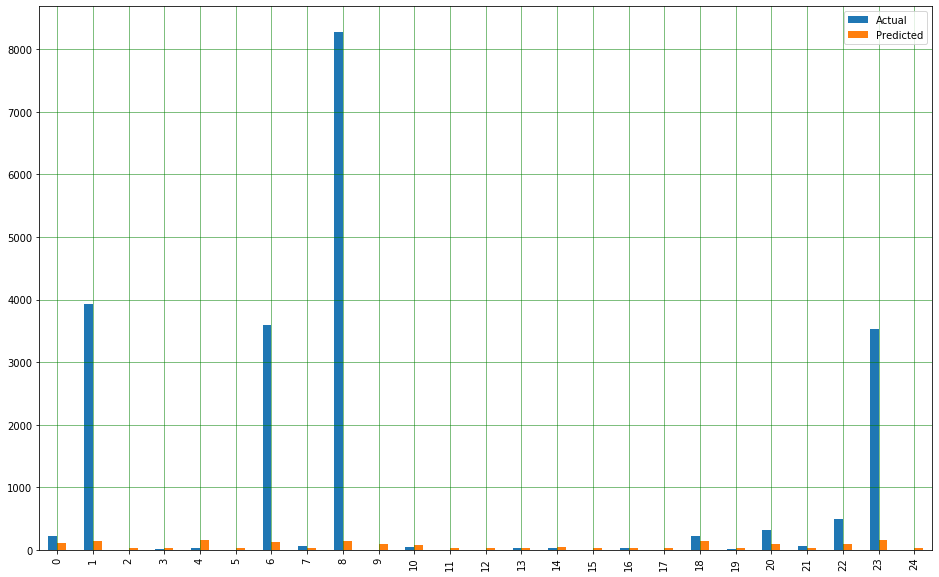

In [41]:
## Grocery vs Cases
svm_regressor.fit(X_grocery_train, y_cases_train.ravel())
grocery_cases_pred = svm_regressor.predict(X_grocery_test)

# Table showing actual vs predicted values
df = pd.DataFrame({'Actual': y_cases_test.flatten(), 'Predicted': grocery_cases_pred.flatten()})
df

# Graphic showing actual vs predicted values
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

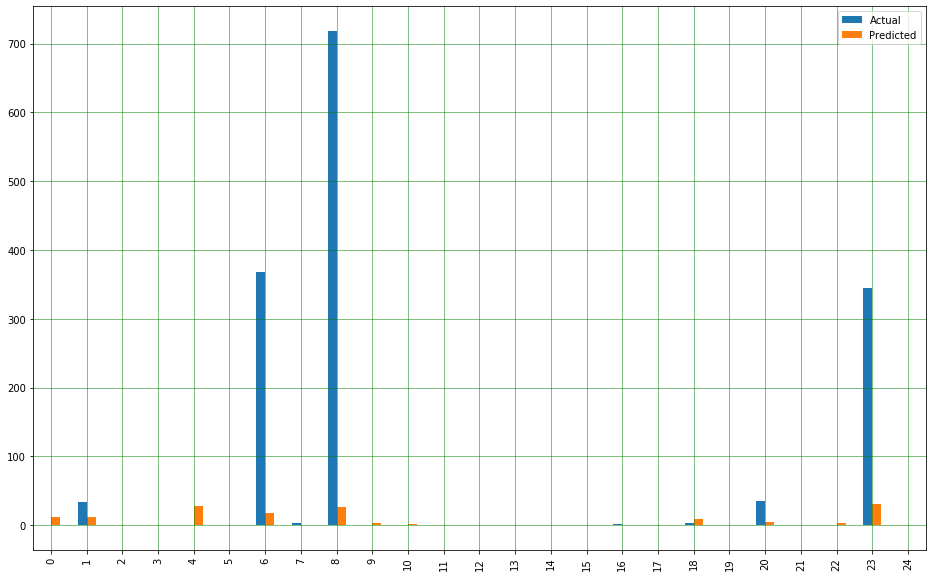

In [42]:
## Grocery vs Deaths
svm_regressor.fit(X_grocery_train, y_deaths_train.ravel())
grocery_deaths_pred = svm_regressor.predict(X_grocery_test)

# Table showing actual vs predicted values
df = pd.DataFrame({'Actual': y_deaths_test.flatten(), 'Predicted': grocery_deaths_pred.flatten()})
df

# Graphic showing actual vs predicted values
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

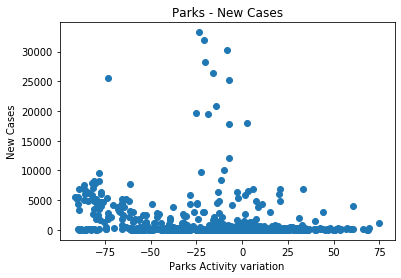

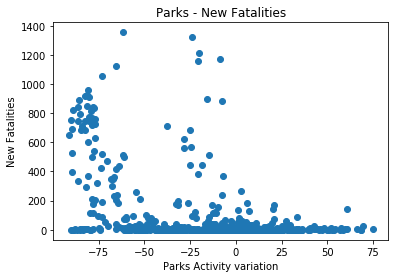

In [43]:
################# Parks Analysis #####################

# show data regarding parks vs Cases
plt.plot(parks,new_cases,'o')
plt.title('Parks - New Cases')  
plt.xlabel('Parks Activity variation')  
plt.ylabel('New Cases')  
plt.show()

# show data regarding pharmacy vs Deaths
plt.plot(parks,new_deaths,'o')
plt.title('Parks - New Fatalities')  
plt.xlabel('Parks Activity variation')  
plt.ylabel('New Fatalities')  
plt.show()

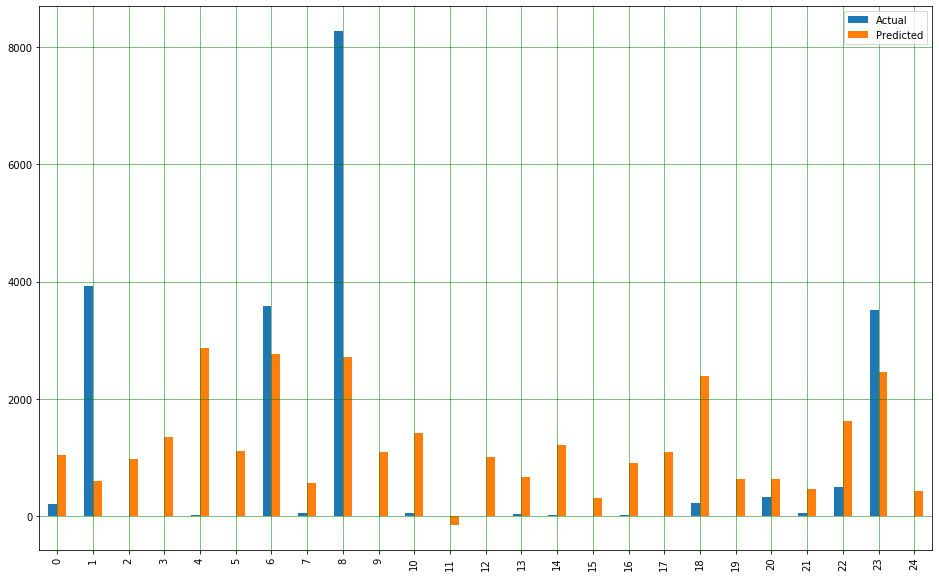

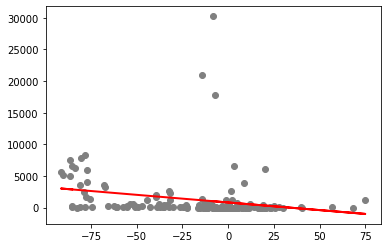

In [44]:
### Linear Regression


linear_regressor_p = LinearRegression()  

## Parks vs Cases
linear_regressor_p.fit(X_parks_train, y_cases_train) #training the algorithm
parks_pred = linear_regressor_p.predict(X_parks_test)

# Table showing actual vs predicted values
df = pd.DataFrame({'Actual': y_cases_test.flatten(), 'Predicted': parks_pred.flatten()})
df

# Graphic showing actual vs predicted values
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# Graphic showing result of the linear regression
plt.scatter(X_parks_test, y_cases_test,  color='gray')
plt.plot(X_parks_test, parks_pred, color='red', linewidth=2)
plt.show()

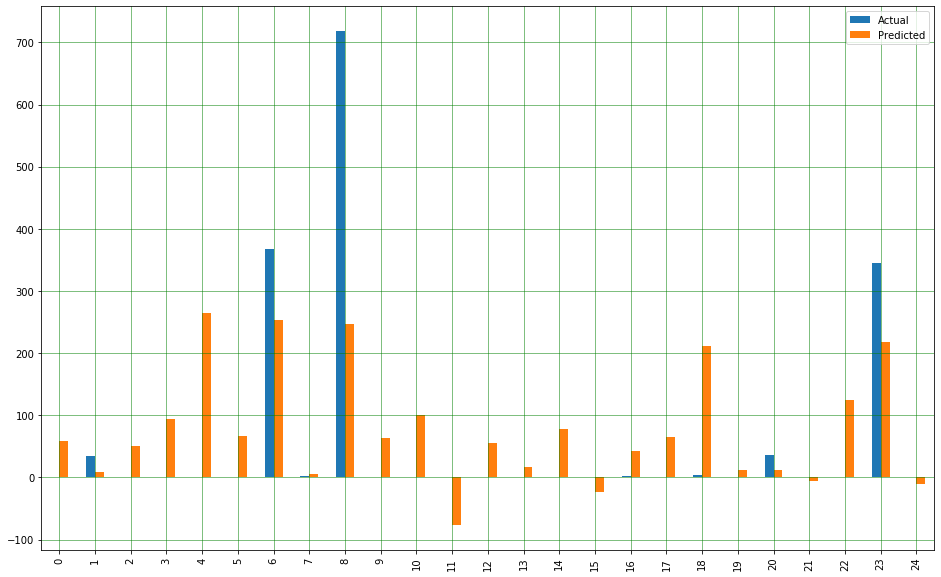

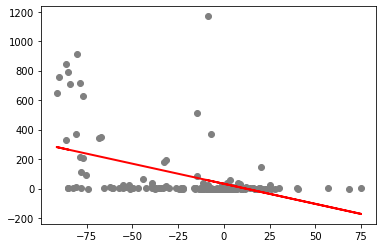

In [45]:
## Parks vs Deaths
linear_regressor_p.fit(X_parks_train, y_deaths_train) #training the algorithm
parks_deaths_pred = linear_regressor_p.predict(X_parks_test)

# Table showing actual vs predicted values
df = pd.DataFrame({'Actual': y_deaths_test.flatten(), 'Predicted': parks_deaths_pred.flatten()})
df

# Graphic showing actual vs predicted values
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# Graphic showing result of the linear regression
plt.scatter(X_parks_test, y_deaths_test,  color='gray')
plt.plot(X_parks_test, parks_deaths_pred, color='red', linewidth=2)
plt.show()

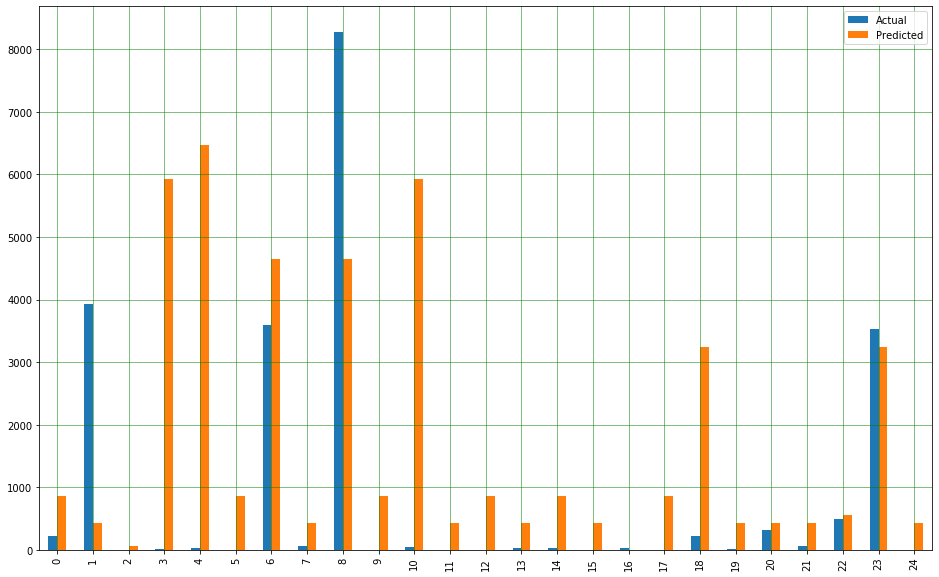

In [46]:
### Decision Tree

# Fit regression model
decision_tree_regressor_p = DecisionTreeRegressor(max_depth=5)

## Parks vs Cases
decision_tree_regressor_p.fit(X_parks_train, y_cases_train)
parks_cases_pred = decision_tree_regressor_p.predict(X_parks_test)

# Table showing actual vs predicted values
df = pd.DataFrame({'Actual': y_cases_test.flatten(), 'Predicted': parks_cases_pred.flatten()})
df

# Graphic showing actual vs predicted values
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

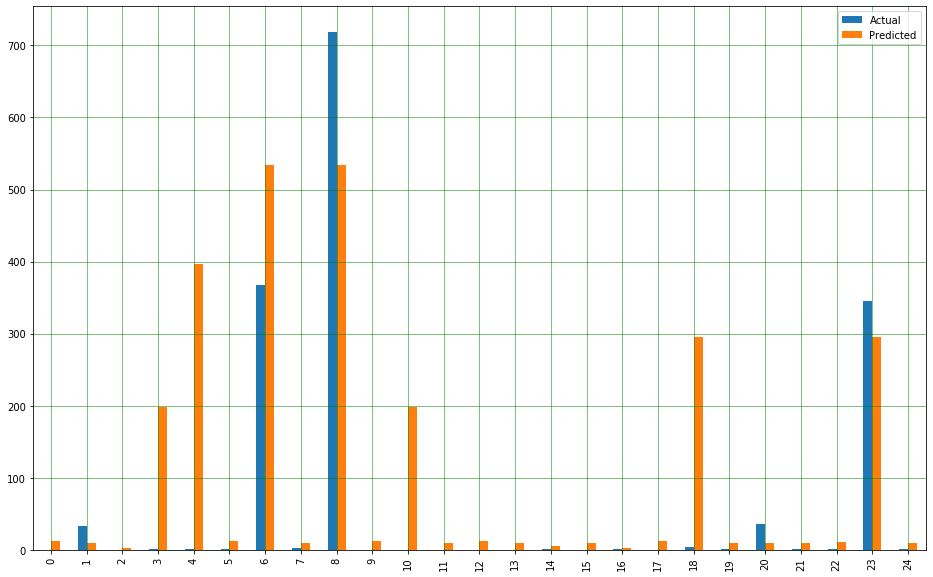

In [47]:
## Parks vs Deaths
decision_tree_regressor_p.fit(X_parks_train, y_deaths_train)
parks_deaths_pred = decision_tree_regressor_p.predict(X_parks_test)

# Table showing actual vs predicted values
df = pd.DataFrame({'Actual': y_deaths_test.flatten(), 'Predicted': parks_deaths_pred.flatten()})
df

# Graphic showing actual vs predicted values
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

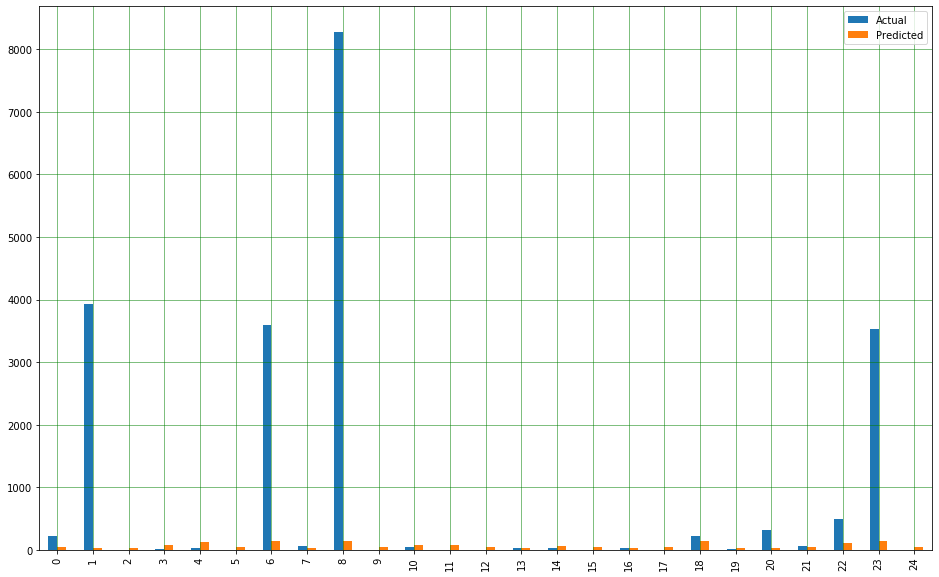

In [48]:
### Support Vector Machines
svm_regressor_p = svm.SVR()

## Parks vs Cases
svm_regressor_p.fit(X_parks_train, y_cases_train.ravel())
parks_cases_pred = svm_regressor_p.predict(X_parks_test)

# Table showing actual vs predicted values
df = pd.DataFrame({'Actual': y_cases_test.flatten(), 'Predicted': parks_cases_pred.flatten()})
df

# Graphic showing actual vs predicted values
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

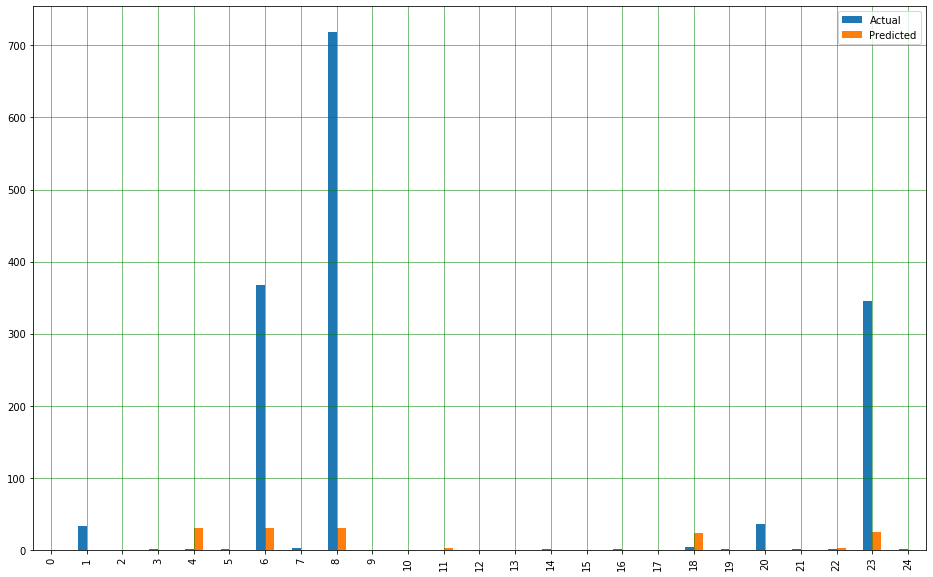

In [49]:
## Parks vs Deaths
svm_regressor_p.fit(X_parks_train, y_deaths_train.ravel())
parks_deaths_pred = svm_regressor_p.predict(X_parks_test)

# Table showing actual vs predicted values
df = pd.DataFrame({'Actual': y_deaths_test.flatten(), 'Predicted': parks_deaths_pred.flatten()})
df

# Graphic showing actual vs predicted values
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

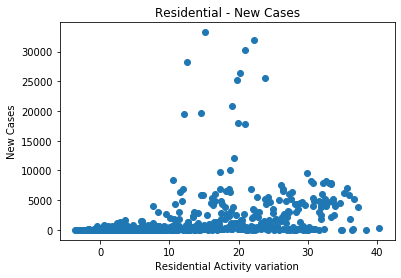

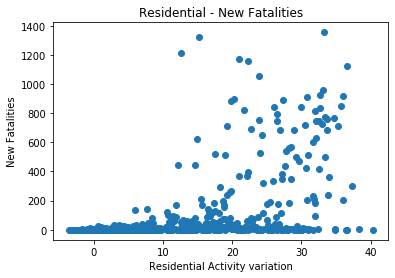

In [50]:
################# Residential Analysis #####################

# show data regarding parks vs Cases
plt.plot(residential,new_cases,'o')
plt.title('Residential - New Cases')  
plt.xlabel('Residential Activity variation')  
plt.ylabel('New Cases')  
plt.show()

# show data regarding pharmacy vs Deaths
plt.plot(residential,new_deaths,'o')
plt.title('Residential - New Fatalities')  
plt.xlabel('Residential Activity variation')  
plt.ylabel('New Fatalities')  
plt.show()

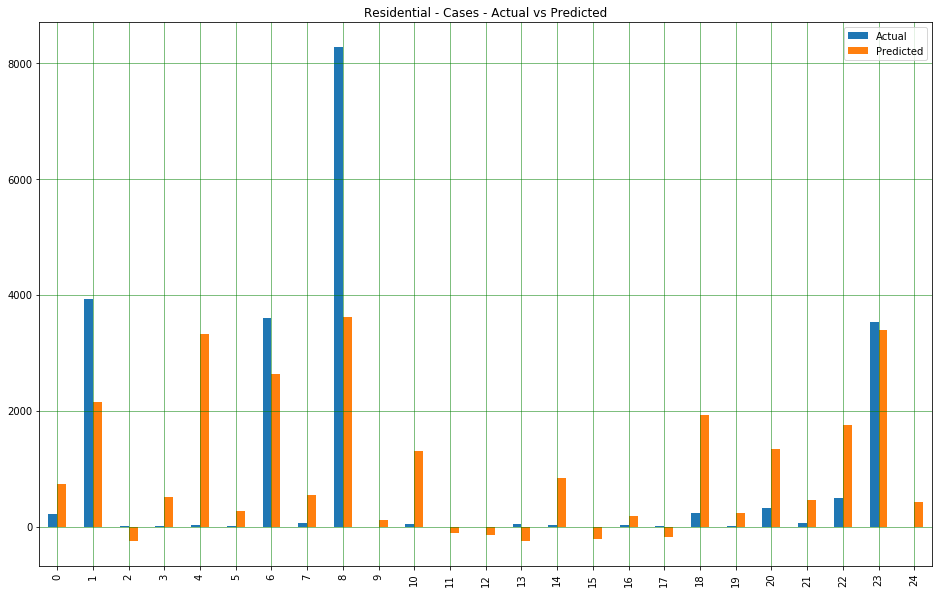

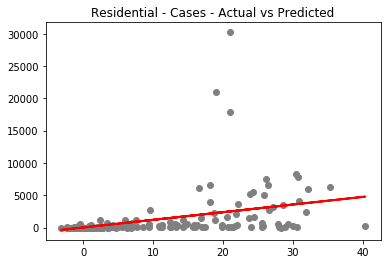

In [51]:
### Linear Regression


linear_regressor_r = LinearRegression()  

## Residential vs Cases
linear_regressor_r.fit(X_residential_train, y_cases_train) #training the algorithm
residential_cases_pred = linear_regressor_r.predict(X_residential_test)

# Table showing actual vs predicted values
df = pd.DataFrame({'Actual': y_cases_test.flatten(), 'Predicted': residential_cases_pred.flatten()})
df

# Graphic showing actual vs predicted values
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.title('Residential - Cases - Actual vs Predicted')  
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# Graphic showing result of the linear regression
plt.title('Residential - Cases - Actual vs Predicted')  
plt.scatter(X_residential_test, y_cases_test,  color='gray')
plt.plot(X_residential_test, residential_cases_pred, color='red', linewidth=2)
plt.show()

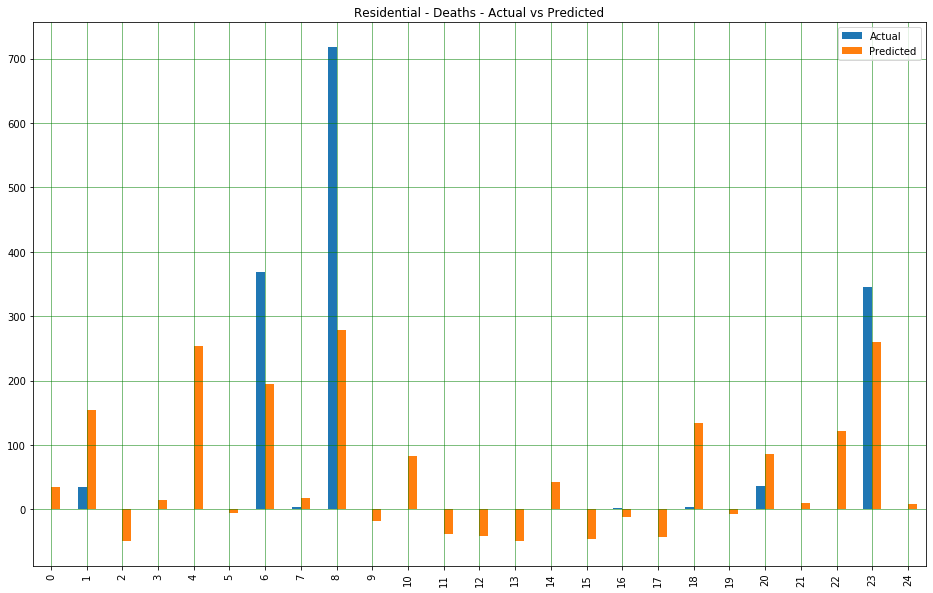

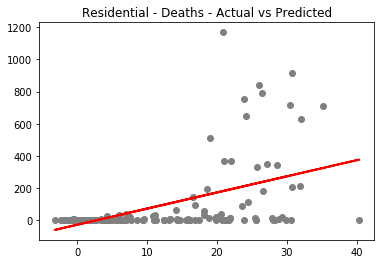

In [52]:
## Residential vs Deaths
linear_regressor_r.fit(X_residential_train, y_deaths_train) #training the algorithm
residential_deaths_pred = linear_regressor_r.predict(X_residential_test)

# Table showing actual vs predicted values
df = pd.DataFrame({'Actual': y_deaths_test.flatten(), 'Predicted': residential_deaths_pred.flatten()})
df

# Graphic showing actual vs predicted values
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.title('Residential - Deaths - Actual vs Predicted')  
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# Graphic showing result of the linear regression
plt.title('Residential - Deaths - Actual vs Predicted')  
plt.scatter(X_residential_test, y_deaths_test,  color='gray')
plt.plot(X_residential_test, residential_deaths_pred, color='red', linewidth=2)
plt.show()

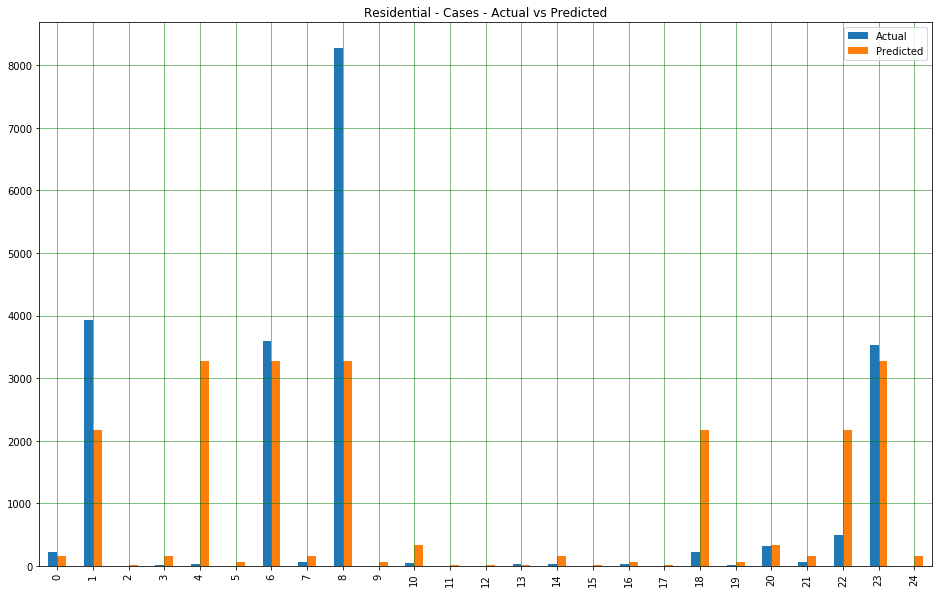

In [53]:
### Decision Tree

# Fit regression model
decision_tree_regressor_r = DecisionTreeRegressor(max_depth=5)

## Residential vs Cases
decision_tree_regressor_r.fit(X_residential_train, y_cases_train)
residential_cases_pred = decision_tree_regressor_r.predict(X_residential_test)

# Table showing actual vs predicted values
df = pd.DataFrame({'Actual': y_cases_test.flatten(), 'Predicted': residential_cases_pred.flatten()})
df

# Graphic showing actual vs predicted values
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.title('Residential - Cases - Actual vs Predicted')  
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

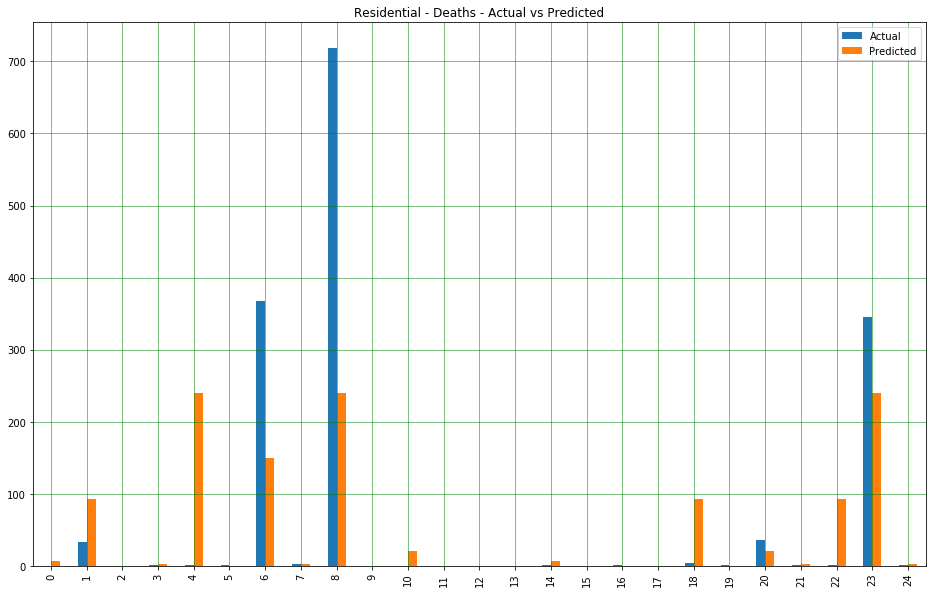

In [54]:
## Residential vs Deaths
decision_tree_regressor_r.fit(X_residential_train, y_deaths_train)
residential_deaths_pred = decision_tree_regressor_r.predict(X_residential_test)

# Table showing actual vs predicted values
df = pd.DataFrame({'Actual': y_deaths_test.flatten(), 'Predicted': residential_deaths_pred.flatten()})
df

# Graphic showing actual vs predicted values
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.title('Residential - Deaths - Actual vs Predicted')  
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

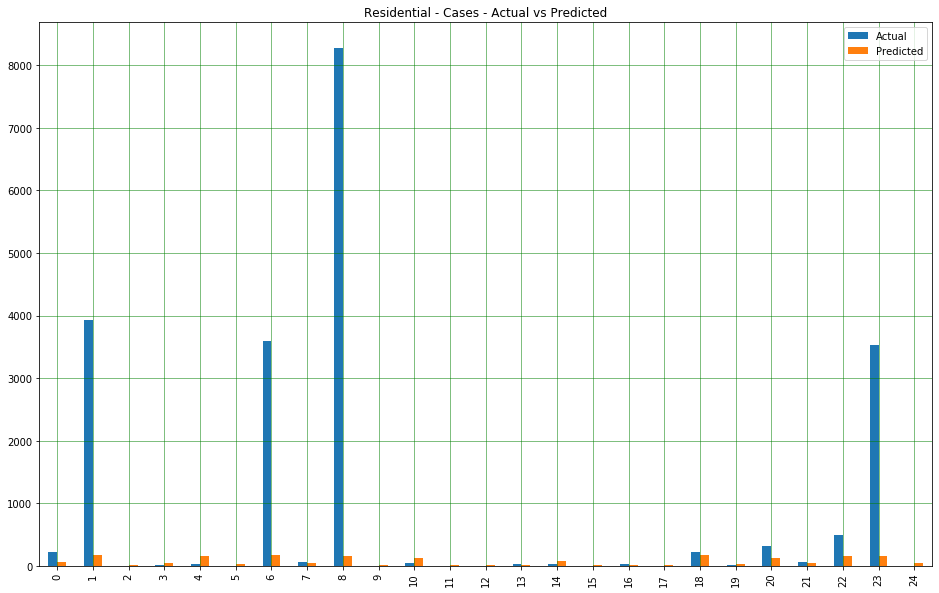

In [55]:
### Support Vector Machines
svm_regressor_r = svm.SVR()

## Residential vs Cases
svm_regressor_r.fit(X_residential_train, y_cases_train.ravel())
residential_cases_pred = svm_regressor_r.predict(X_residential_test)

# Table showing actual vs predicted values
df = pd.DataFrame({'Actual': y_cases_test.flatten(), 'Predicted': residential_cases_pred.flatten()})
df

# Graphic showing actual vs predicted values
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.title('Residential - Cases - Actual vs Predicted')  
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

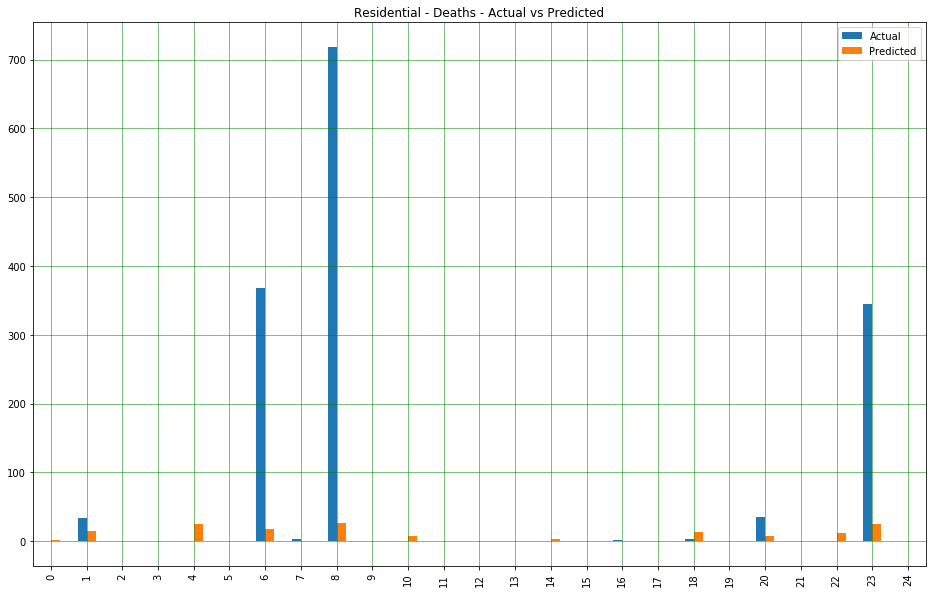

In [56]:
## Residential vs Cases
svm_regressor_r.fit(X_residential_train, y_deaths_train.ravel())
residential_deaths_pred = svm_regressor_r.predict(X_residential_test)

# Table showing actual vs predicted values
df = pd.DataFrame({'Actual': y_deaths_test.flatten(), 'Predicted': residential_deaths_pred.flatten()})
df

# Graphic showing actual vs predicted values
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.title('Residential - Deaths - Actual vs Predicted')  
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

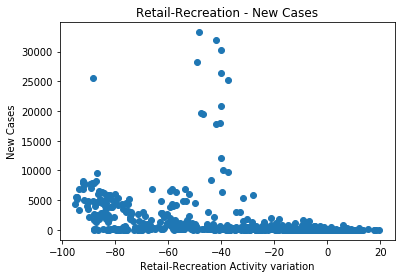

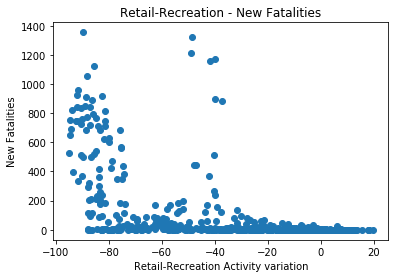

In [57]:
################# Retail-Recreation Analysis #####################

# show data regarding parks vs Cases
plt.plot(retail,new_cases,'o')
plt.title('Retail-Recreation - New Cases')  
plt.xlabel('Retail-Recreation Activity variation')  
plt.ylabel('New Cases')  
plt.show()

# show data regarding pharmacy vs Deaths
plt.plot(retail,new_deaths,'o')
plt.title('Retail-Recreation - New Fatalities')  
plt.xlabel('Retail-Recreation Activity variation')  
plt.ylabel('New Fatalities')  
plt.show()

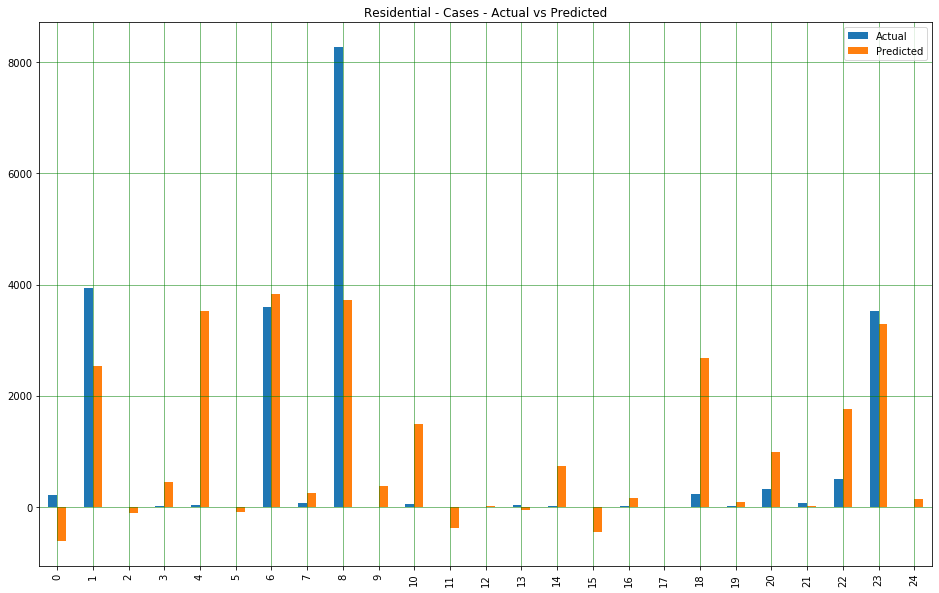

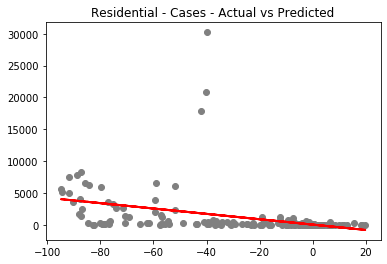

In [58]:
### Linear Regression


linear_regressor_rr = LinearRegression()  

## Retail-Recreation vs Cases
linear_regressor_rr.fit(X_retail_train, y_cases_train) #training the algorithm
retail_cases_pred = linear_regressor_rr.predict(X_retail_test)

# Table showing actual vs predicted values
df = pd.DataFrame({'Actual': y_cases_test.flatten(), 'Predicted': retail_cases_pred.flatten()})
df

# Graphic showing actual vs predicted values
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.title('Residential - Cases - Actual vs Predicted')  
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# Graphic showing result of the linear regression
plt.title('Residential - Cases - Actual vs Predicted')  
plt.scatter(X_retail_test, y_cases_test,  color='gray')
plt.plot(X_retail_test, retail_cases_pred, color='red', linewidth=2)
plt.show()

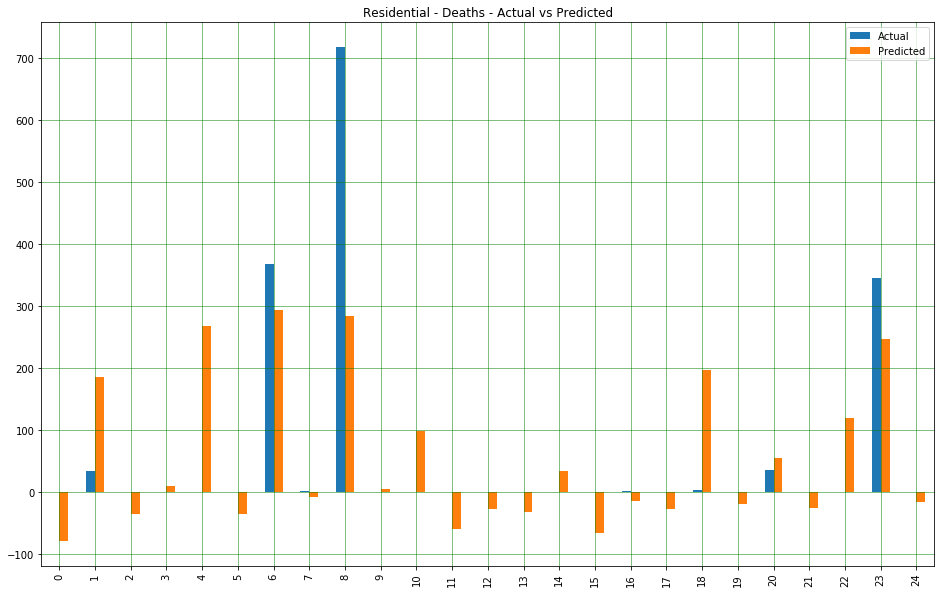

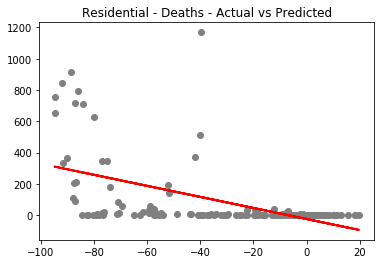

In [59]:
## Retail-Recreation vs Deaths
linear_regressor_rr.fit(X_retail_train, y_deaths_train) #training the algorithm
retail_deaths_pred = linear_regressor_rr.predict(X_retail_test)

# Table showing actual vs predicted values
df = pd.DataFrame({'Actual': y_deaths_test.flatten(), 'Predicted': retail_deaths_pred.flatten()})
df

# Graphic showing actual vs predicted values
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.title('Residential - Deaths - Actual vs Predicted')  
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# Graphic showing result of the linear regression
plt.title('Residential - Deaths - Actual vs Predicted')  
plt.scatter(X_retail_test, y_deaths_test,  color='gray')
plt.plot(X_retail_test, retail_deaths_pred, color='red', linewidth=2)
plt.show()

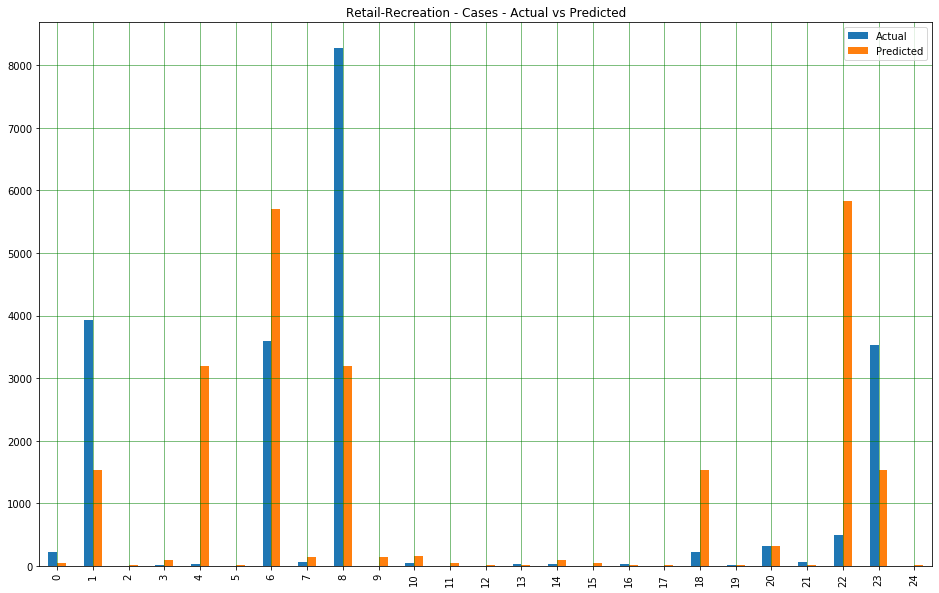

In [60]:
### Decision Tree

# Fit regression model
decision_tree_regressor_rr = DecisionTreeRegressor(max_depth=5)

## Retail-Recreation vs Cases
decision_tree_regressor_rr.fit(X_retail_train, y_cases_train)
retail_cases_pred = decision_tree_regressor_rr.predict(X_retail_test)

# Table showing actual vs predicted values
df = pd.DataFrame({'Actual': y_cases_test.flatten(), 'Predicted': retail_cases_pred.flatten()})
df

# Graphic showing actual vs predicted values
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.title('Retail-Recreation - Cases - Actual vs Predicted')  
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

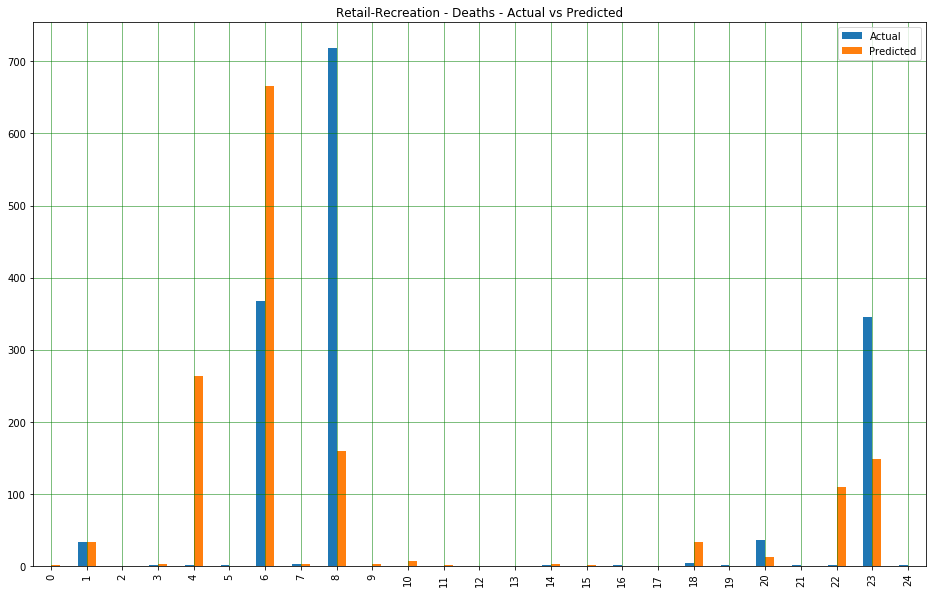

In [61]:
## Retail-Recreation vs Deaths
decision_tree_regressor_rr.fit(X_retail_train, y_deaths_train)
retail_deaths_pred = decision_tree_regressor_rr.predict(X_retail_test)

# Table showing actual vs predicted values
df = pd.DataFrame({'Actual': y_deaths_test.flatten(), 'Predicted': retail_deaths_pred.flatten()})
df

# Graphic showing actual vs predicted values
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.title('Retail-Recreation - Deaths - Actual vs Predicted')  
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

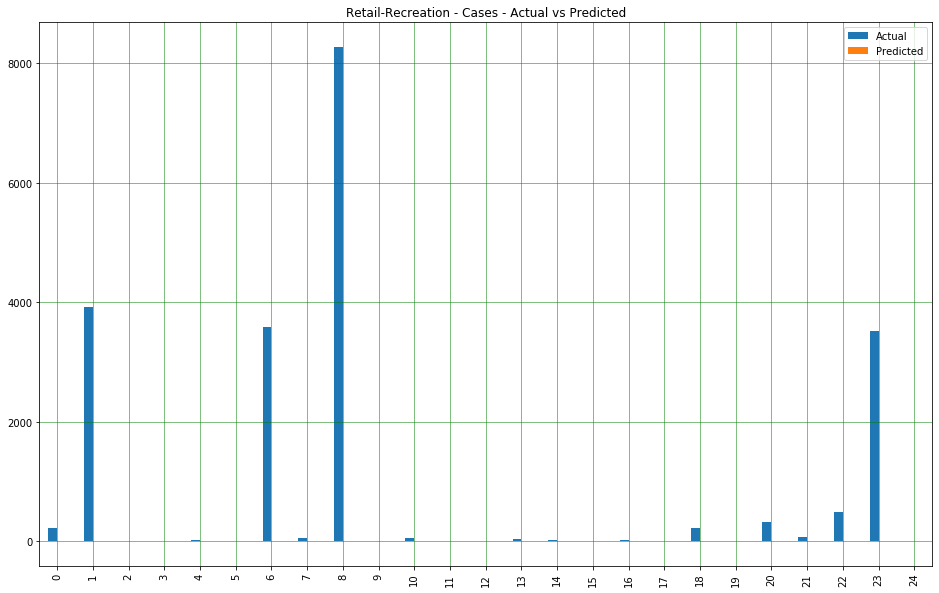

In [62]:
### Support Vector Machines
svm_regressor_rr = svm.SVR()

## Retail-Recreation vs Cases
svm_regressor_rr.fit(X_retail_train, y_cases_train.ravel())
retail_cases_pred = svm_regressor_r.predict(X_retail_test)

# Table showing actual vs predicted values
df = pd.DataFrame({'Actual': y_cases_test.flatten(), 'Predicted': retail_cases_pred.flatten()})
df

# Graphic showing actual vs predicted values
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.title('Retail-Recreation - Cases - Actual vs Predicted')  
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

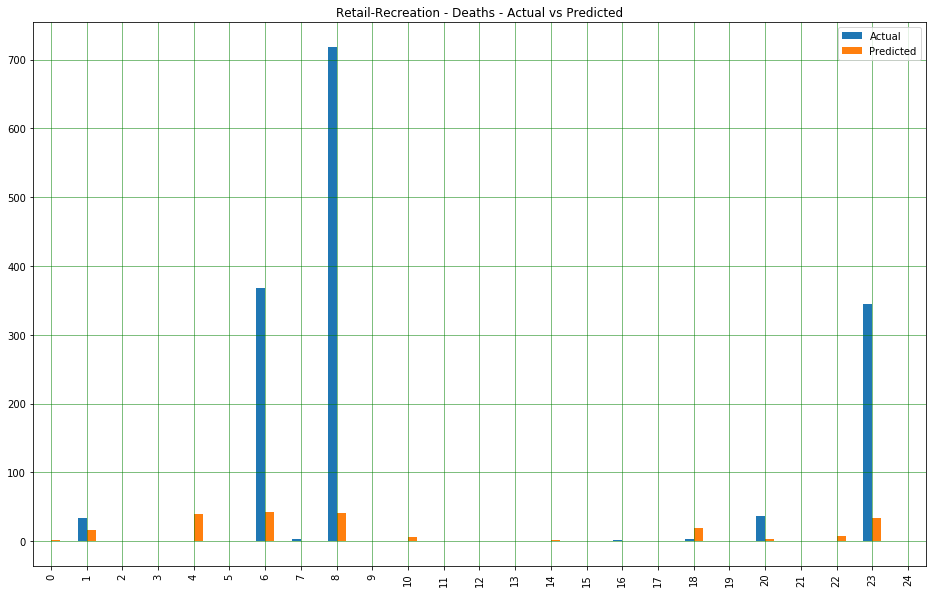

In [63]:
## Retail-Recreation vs Deaths
svm_regressor_rr.fit(X_retail_train, y_deaths_train.ravel())
retail_deaths_pred = svm_regressor_rr.predict(X_retail_test)

# Table showing actual vs predicted values
df = pd.DataFrame({'Actual': y_deaths_test.flatten(), 'Predicted': retail_deaths_pred.flatten()})
df

# Graphic showing actual vs predicted values
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.title('Retail-Recreation - Deaths - Actual vs Predicted')  
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

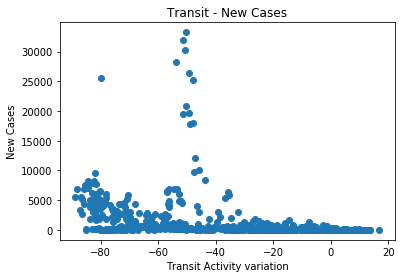

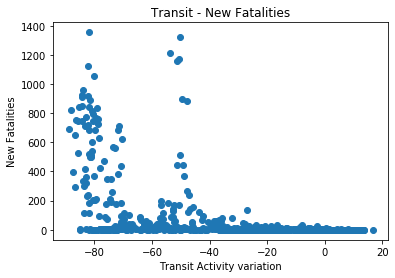

In [64]:
################# Transit Analysis #####################

# show data regarding parks vs Cases
plt.plot(transit,new_cases,'o') 
plt.title('Transit - New Cases')  
plt.xlabel('Transit Activity variation')  
plt.ylabel('New Cases')  
plt.show()

# show data regarding pharmacy vs Deaths
plt.plot(transit,new_deaths,'o')
plt.title('Transit - New Fatalities')  
plt.xlabel('Transit Activity variation')  
plt.ylabel('New Fatalities')  
plt.show()

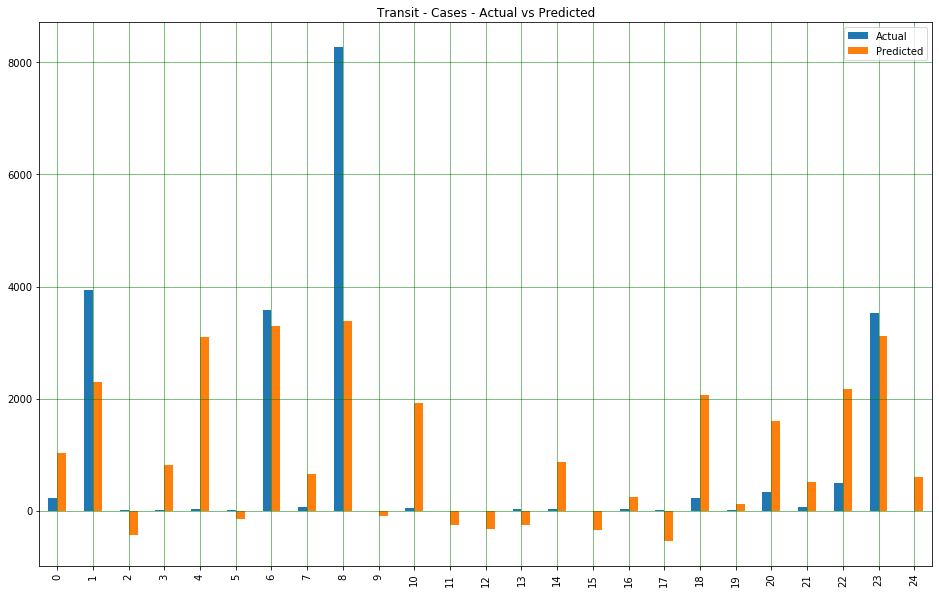

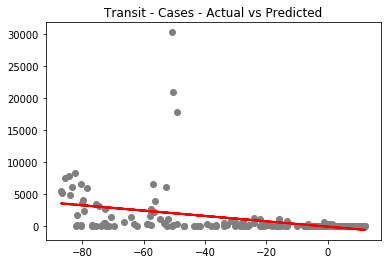

In [65]:
### Linear Regression


linear_regressor_t = LinearRegression()  

## Transit vs Cases
linear_regressor_t.fit(X_transit_train, y_cases_train) #training the algorithm
transit_cases_pred = linear_regressor_t.predict(X_transit_test)

# Table showing actual vs predicted values
df = pd.DataFrame({'Actual': y_cases_test.flatten(), 'Predicted': transit_cases_pred.flatten()})
df

# Graphic showing actual vs predicted values
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.title('Transit - Cases - Actual vs Predicted')  
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# Graphic showing result of the linear regression
plt.title('Transit - Cases - Actual vs Predicted')  
plt.scatter(X_transit_test, y_cases_test,  color='gray')
plt.plot(X_transit_test, transit_cases_pred, color='red', linewidth=2)
plt.show()

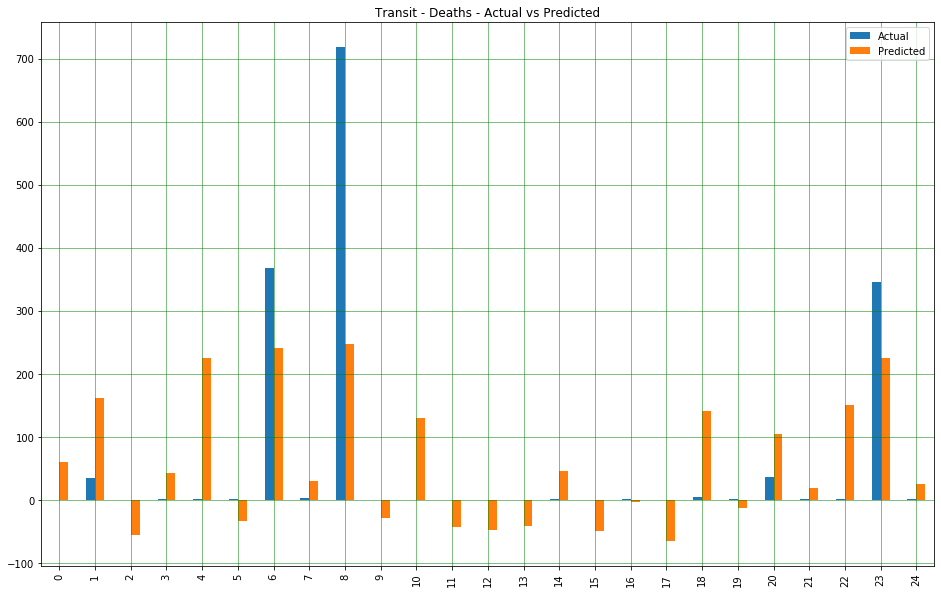

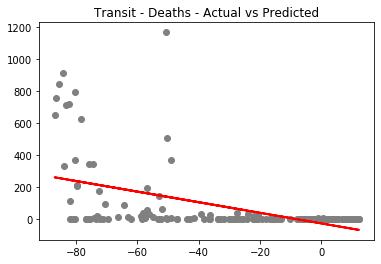

In [66]:
## Transit vs Deaths
linear_regressor_t.fit(X_transit_train, y_deaths_train) #training the algorithm
transit_deaths_pred = linear_regressor_t.predict(X_transit_test)

# Table showing actual vs predicted values
df = pd.DataFrame({'Actual': y_deaths_test.flatten(), 'Predicted': transit_deaths_pred.flatten()})
df

# Graphic showing actual vs predicted values
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.title('Transit - Deaths - Actual vs Predicted')  
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# Graphic showing result of the linear regression
plt.title('Transit - Deaths - Actual vs Predicted')  
plt.scatter(X_transit_test, y_deaths_test,  color='gray')
plt.plot(X_transit_test, transit_deaths_pred, color='red', linewidth=2)
plt.show()

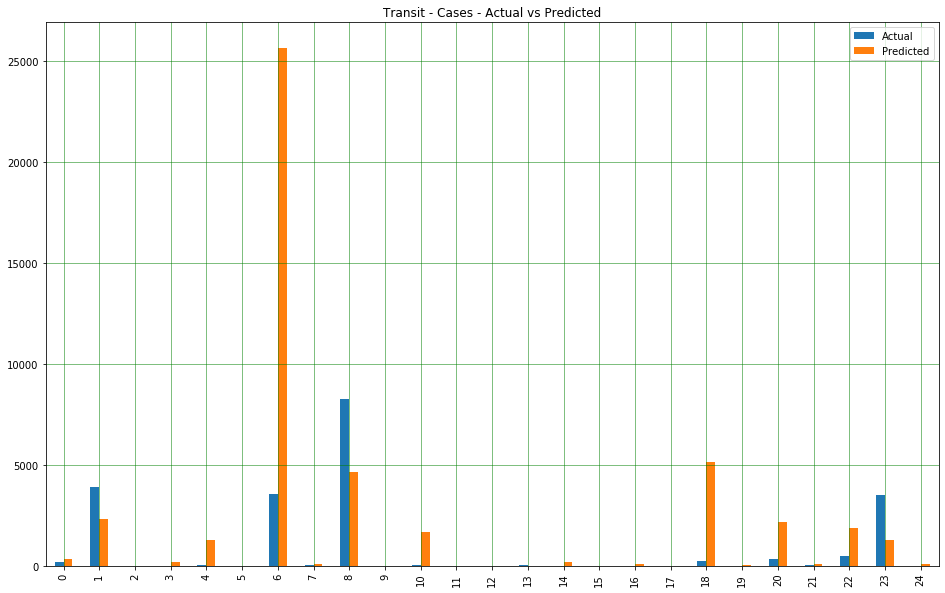

In [67]:
### Decision Tree

# Fit regression model
decision_tree_regressor_t = DecisionTreeRegressor(max_depth=5)

## Transit vs Cases
decision_tree_regressor_t.fit(X_transit_train, y_cases_train)
transit_cases_pred = decision_tree_regressor_t.predict(X_transit_test)

# Table showing actual vs predicted values
df = pd.DataFrame({'Actual': y_cases_test.flatten(), 'Predicted': transit_cases_pred.flatten()})
df

# Graphic showing actual vs predicted values
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.title('Transit - Cases - Actual vs Predicted')  
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()


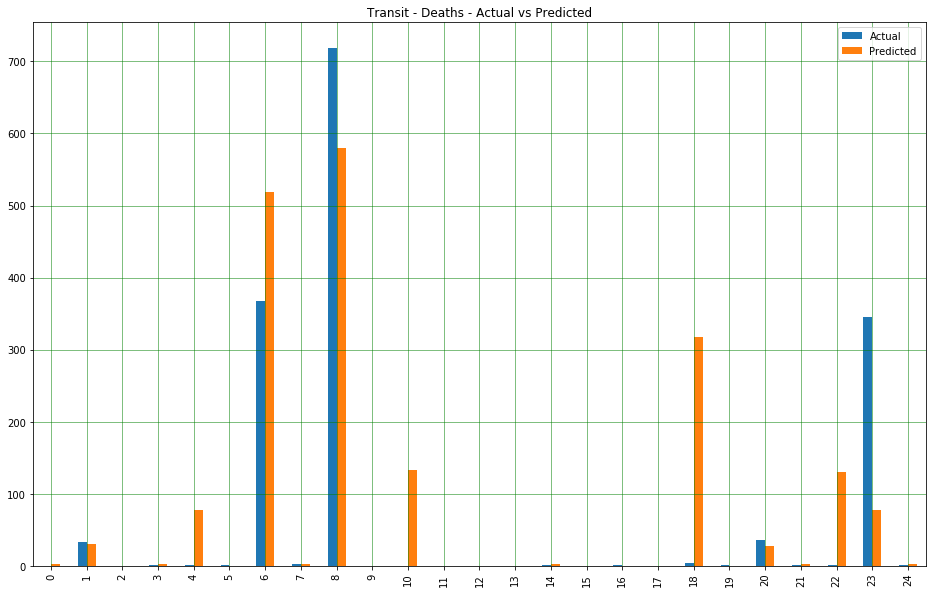

In [68]:
## Transit vs Cases
decision_tree_regressor_t.fit(X_transit_train, y_deaths_train)
transit_deaths_pred = decision_tree_regressor_t.predict(X_transit_test)


# Table showing actual vs predicted values
df = pd.DataFrame({'Actual': y_deaths_test.flatten(), 'Predicted': transit_deaths_pred.flatten()})
df

# Graphic showing actual vs predicted values
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.title('Transit - Deaths - Actual vs Predicted')  
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()


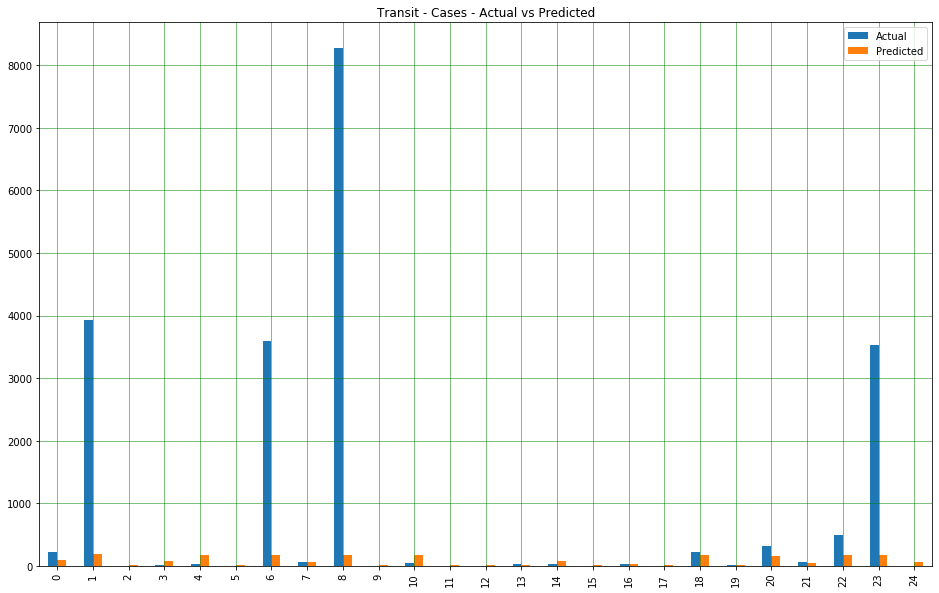

In [69]:
### Support Vector Machines
svm_regressor_t = svm.SVR()

## Transit vs Cases
svm_regressor_t.fit(X_transit_train, y_cases_train.ravel())
transit_cases_pred = svm_regressor_t.predict(X_transit_test)

# Table showing actual vs predicted values
df = pd.DataFrame({'Actual': y_cases_test.flatten(), 'Predicted': transit_cases_pred.flatten()})
df

# Graphic showing actual vs predicted values
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.title('Transit - Cases - Actual vs Predicted')  
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

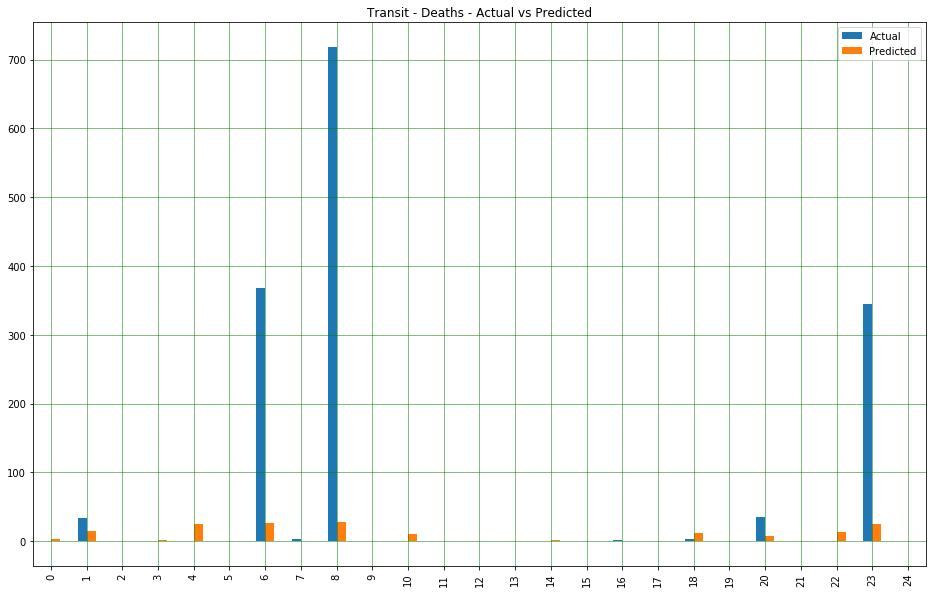

In [70]:
## Transit vs Deaths
svm_regressor_t.fit(X_transit_train, y_deaths_train.ravel())
transit_deaths_pred = svm_regressor_t.predict(X_transit_test)

# Table showing actual vs predicted values
df = pd.DataFrame({'Actual': y_deaths_test.flatten(), 'Predicted': transit_deaths_pred.flatten()})
df

# Graphic showing actual vs predicted values
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.title('Transit - Deaths - Actual vs Predicted')  
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

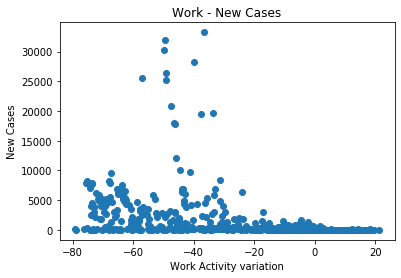

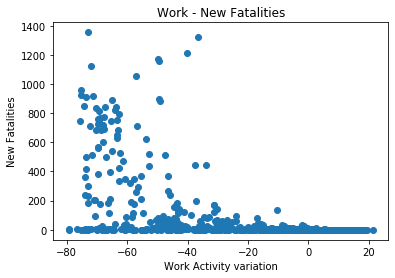

In [71]:
################# Work Analysis #####################

# show data regarding parks vs Cases
plt.plot(work,new_cases,'o')
plt.title('Work - New Cases')  
plt.xlabel('Work Activity variation')  
plt.ylabel('New Cases')  
plt.show()

# show data regarding pharmacy vs Deaths
plt.plot(work,new_deaths,'o')
plt.title('Work - New Fatalities')  
plt.xlabel('Work Activity variation')  
plt.ylabel('New Fatalities')  
plt.show()

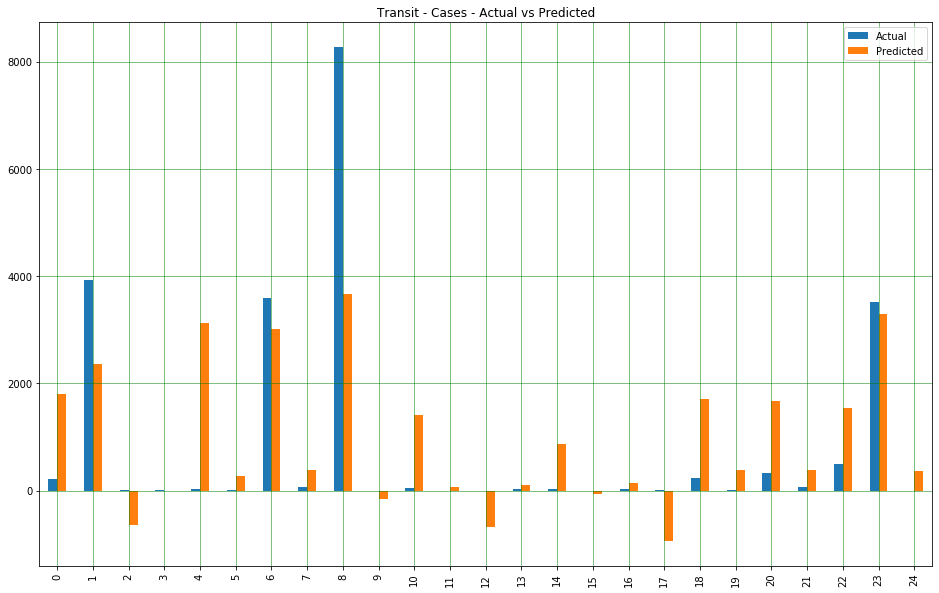

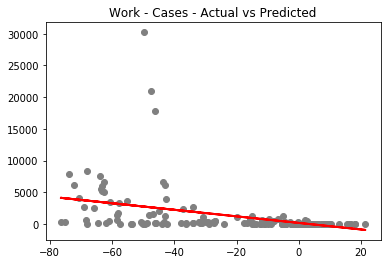

In [72]:
### Linear Regression


linear_regressor_w = LinearRegression()  

## Work vs Cases
linear_regressor_w.fit(X_work_train, y_cases_train) #training the algorithm
work_cases_pred = linear_regressor_w.predict(X_work_test)

# Table showing actual vs predicted values
df = pd.DataFrame({'Actual': y_cases_test.flatten(), 'Predicted': work_cases_pred.flatten()})
df

# Graphic showing actual vs predicted values
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.title('Transit - Cases - Actual vs Predicted')  
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# Graphic showing result of the linear regression
plt.title('Work - Cases - Actual vs Predicted')  
plt.scatter(X_work_test, y_cases_test,  color='gray')
plt.plot(X_work_test, work_cases_pred, color='red', linewidth=2)
plt.show()

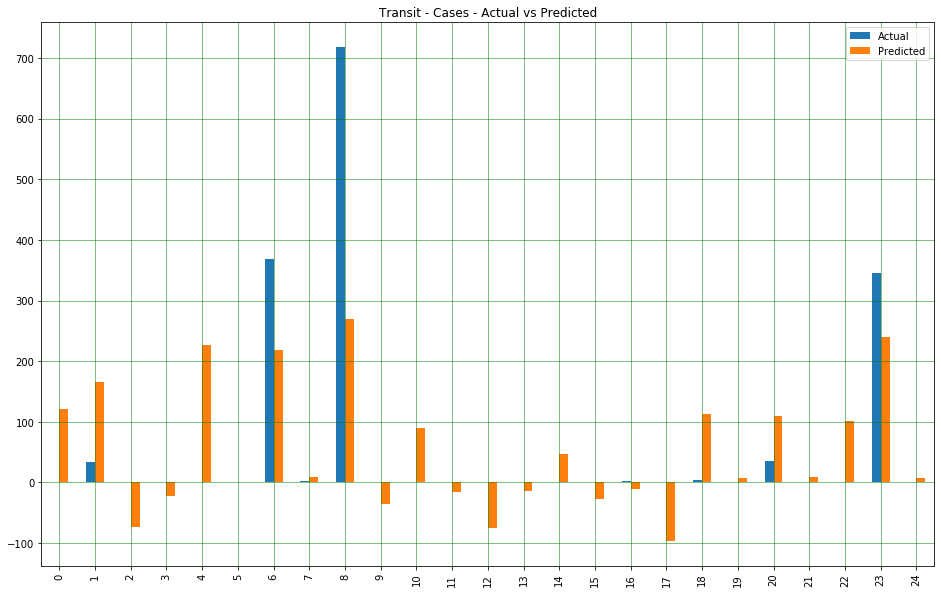

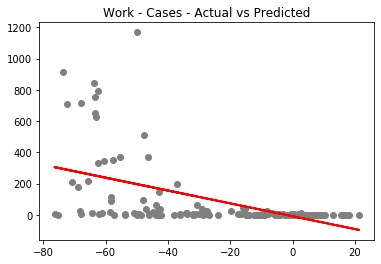

In [73]:
## Work vs Deaths
linear_regressor_w.fit(X_work_train, y_deaths_train) #training the algorithm
work_deaths_pred = linear_regressor_w.predict(X_work_test)

# Table showing actual vs predicted values
df = pd.DataFrame({'Actual': y_deaths_test.flatten(), 'Predicted': work_deaths_pred.flatten()})
df

# Graphic showing actual vs predicted values
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.title('Transit - Cases - Actual vs Predicted')  
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# Graphic showing result of the linear regression
plt.title('Work - Cases - Actual vs Predicted')  
plt.scatter(X_work_test, y_deaths_test,  color='gray')
plt.plot(X_work_test, work_deaths_pred, color='red', linewidth=2)
plt.show()

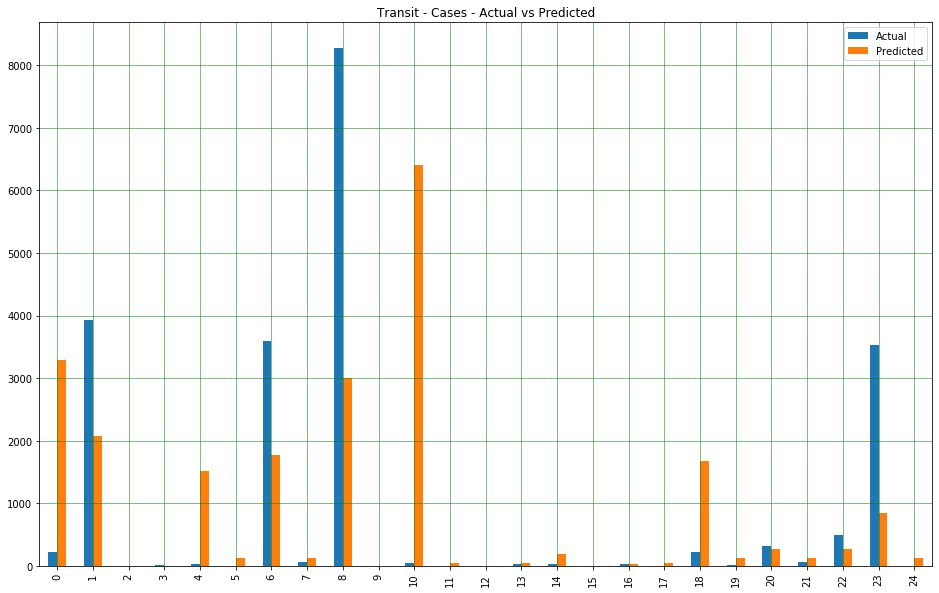

In [74]:
### Decision Tree

# Fit regression model
decision_tree_regressor_w = DecisionTreeRegressor(max_depth=5)

## Work vs Cases
decision_tree_regressor_w.fit(X_work_train, y_cases_train)
work_cases_pred = decision_tree_regressor_w.predict(X_work_test)


# Table showing actual vs predicted values
df = pd.DataFrame({'Actual': y_cases_test.flatten(), 'Predicted': work_cases_pred.flatten()})
df

# Graphic showing actual vs predicted values
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.title('Transit - Cases - Actual vs Predicted')  
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()


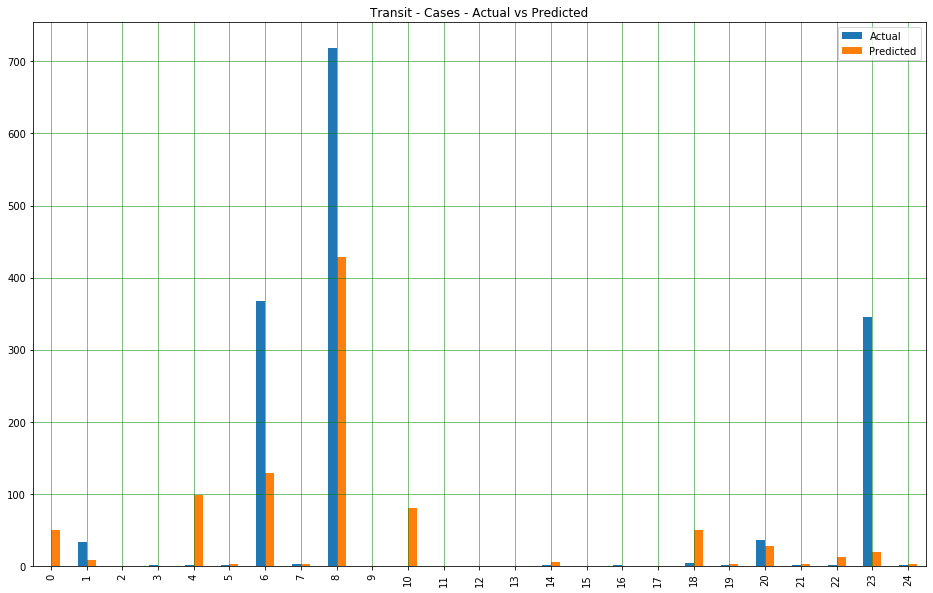

In [75]:
## Work vs Deaths
decision_tree_regressor_w.fit(X_work_train, y_deaths_train)
work_deaths_pred = decision_tree_regressor_w.predict(X_work_test)


# Table showing actual vs predicted values
df = pd.DataFrame({'Actual': y_deaths_test.flatten(), 'Predicted': work_deaths_pred.flatten()})
df

# Graphic showing actual vs predicted values
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.title('Transit - Cases - Actual vs Predicted')  
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

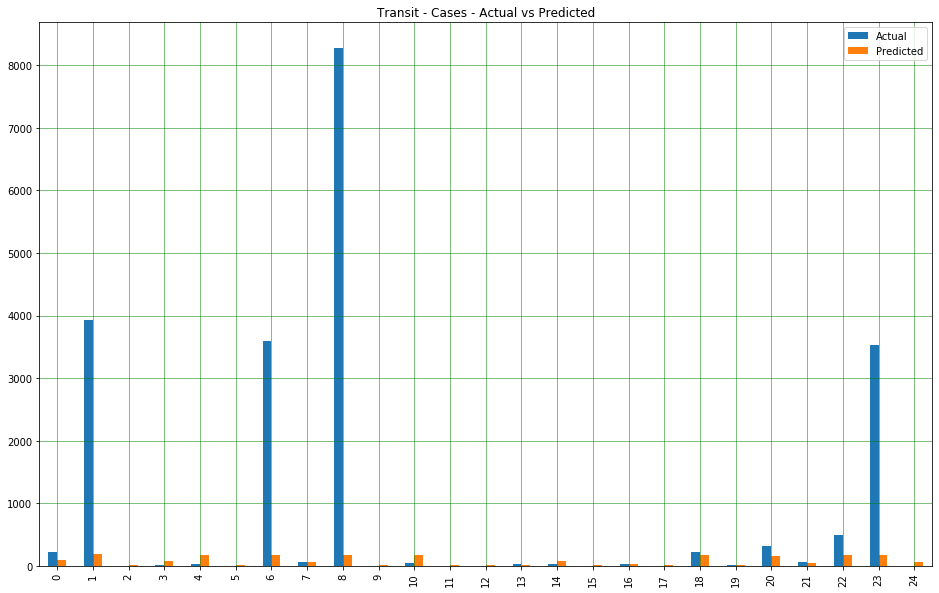

In [76]:
### Support Vector Machines
svm_regressor_w = svm.SVR()

## Transit vs Cases
svm_regressor_w.fit(X_transit_train, y_cases_train.ravel())
work_cases_pred = svm_regressor_w.predict(X_transit_test)

# Table showing actual vs predicted values
df = pd.DataFrame({'Actual': y_cases_test.flatten(), 'Predicted': work_cases_pred.flatten()})
df

# Graphic showing actual vs predicted values
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.title('Transit - Cases - Actual vs Predicted')  
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()


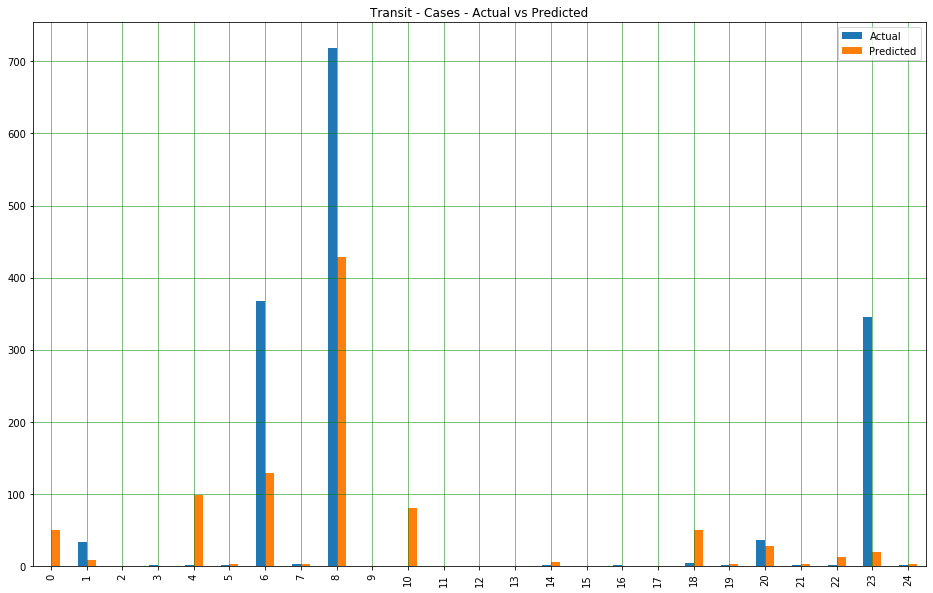

In [77]:

# Table showing actual vs predicted values
df = pd.DataFrame({'Actual': y_deaths_test.flatten(), 'Predicted': work_deaths_pred.flatten()})
df

# Graphic showing actual vs predicted values
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.title('Transit - Cases - Actual vs Predicted')  
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [78]:
### Linear Regression


linear_regressor = LinearRegression()  

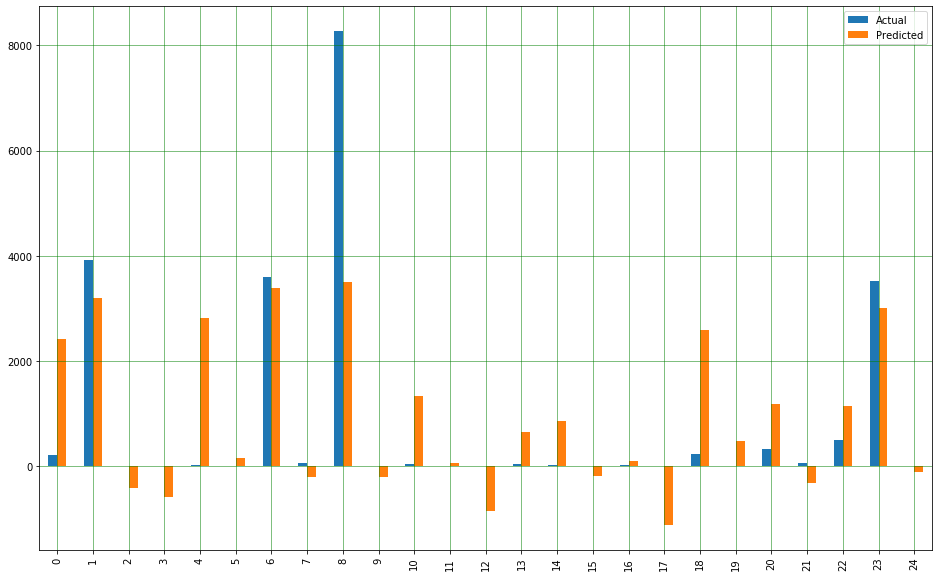

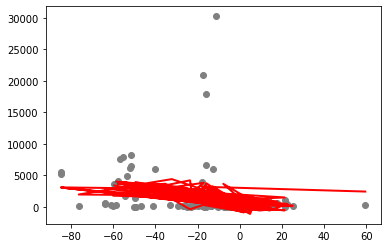

In [79]:
## All vs Cases
linear_regressor.fit(training, y_cases_train) #training the algorithm
grocery_cases_pred = linear_regressor.predict(test)

# Table showing actual vs predicted values
df = pd.DataFrame({'Actual': y_cases_test.flatten(), 'Predicted': grocery_cases_pred.flatten()})
df

# Graphic showing actual vs predicted values
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# Graphic showing result of the linear regression
plt.scatter(X_grocery_test, y_cases_test,  color='gray')
plt.plot(X_grocery_test, grocery_cases_pred, color='red', linewidth=2)
plt.show()

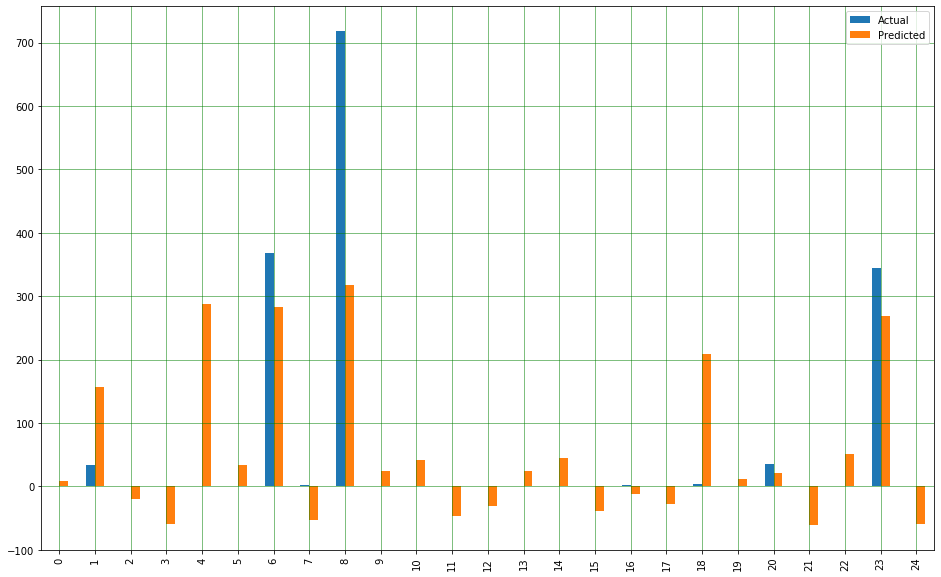

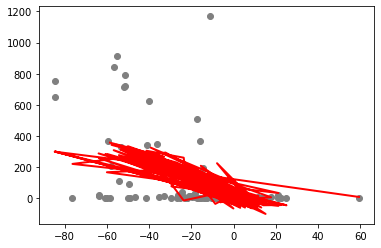

In [80]:
## Grocery vs Deaths
linear_regressor.fit(training, y_deaths_train) #training the algorithm
grocery_deaths_pred = linear_regressor.predict(test)

# Table showing actual vs predicted values
df = pd.DataFrame({'Actual': y_deaths_test.flatten(), 'Predicted': grocery_deaths_pred.flatten()})
df

# Graphic showing actual vs predicted values
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# Graphic showing result of the linear regression
plt.scatter(X_grocery_test, y_deaths_test,  color='gray')
plt.plot(X_grocery_test, grocery_deaths_pred, color='red', linewidth=2)
plt.show()

In [81]:
### Decision Tree

# Fit regression model
decision_tree_regressor = DecisionTreeRegressor(max_depth=5)

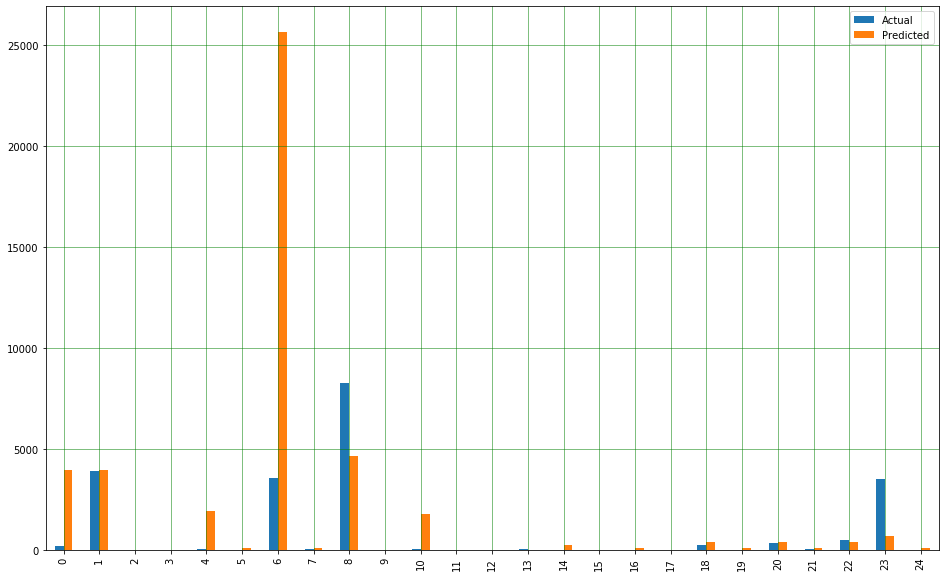

In [82]:
## All vs Cases
decision_tree_regressor.fit(training, y_cases_train)
grocery_cases_pred = decision_tree_regressor.predict(test)

# Table showing actual vs predicted values
df = pd.DataFrame({'Actual': y_cases_test.flatten(), 'Predicted': grocery_cases_pred.flatten()})
df

# Graphic showing actual vs predicted values
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

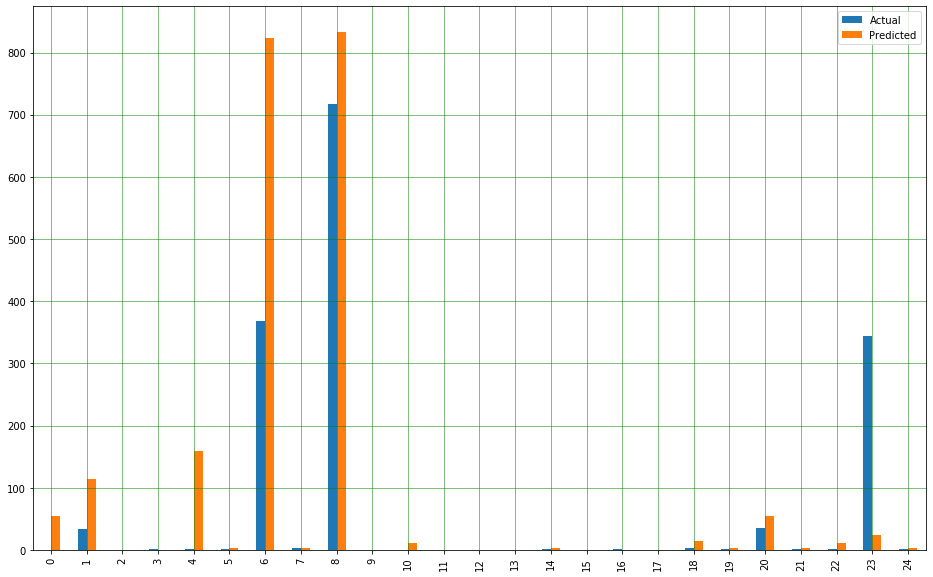

In [83]:
## All vs Deaths
decision_tree_regressor.fit(training, y_deaths_train)
grocery_deaths_pred = decision_tree_regressor.predict(test)

# Table showing actual vs predicted values
df = pd.DataFrame({'Actual': y_deaths_test.flatten(), 'Predicted': grocery_deaths_pred.flatten()})
df

# Graphic showing actual vs predicted values
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [84]:
### Support Vector Machecins
svm_regressor = svm.SVR()

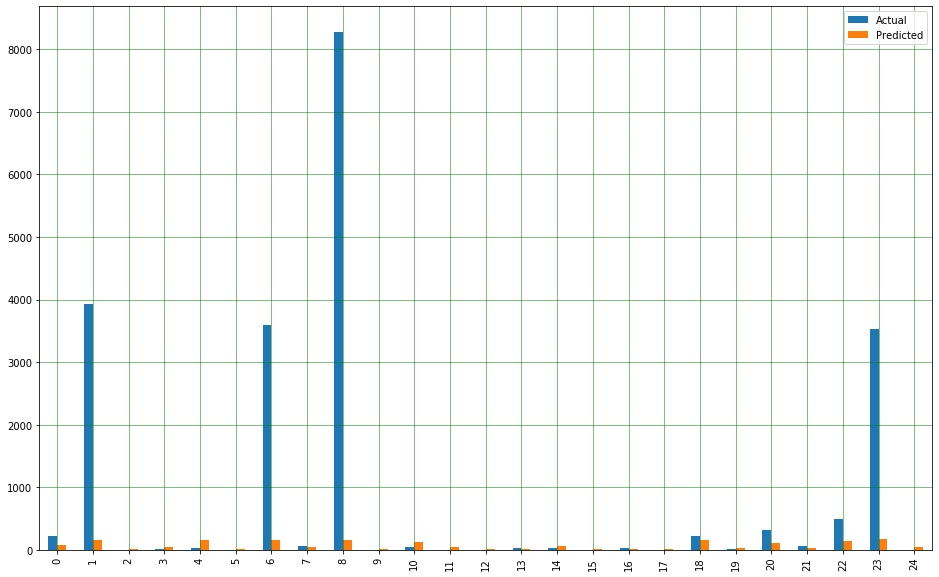

In [85]:
## All vs Cases
svm_regressor.fit(training, y_cases_train.ravel())
grocery_cases_pred = svm_regressor.predict(test)

# Table showing actual vs predicted values
df = pd.DataFrame({'Actual': y_cases_test.flatten(), 'Predicted': grocery_cases_pred.flatten()})
df

# Graphic showing actual vs predicted values
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

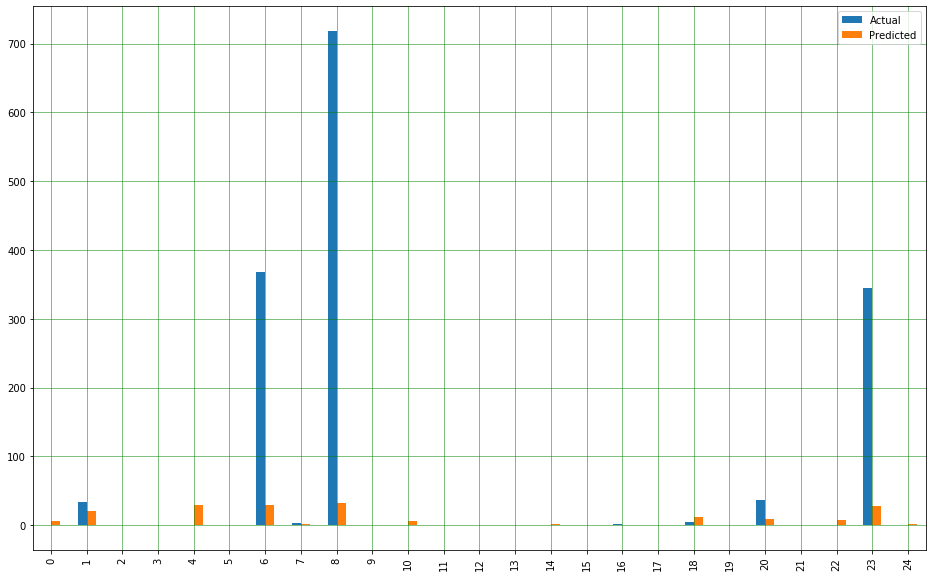

In [86]:
## All vs Deaths
svm_regressor.fit(training, y_deaths_train.ravel())
grocery_deaths_pred = svm_regressor.predict(test)

# Table showing actual vs predicted values
df = pd.DataFrame({'Actual': y_deaths_test.flatten(), 'Predicted': grocery_deaths_pred.flatten()})
df

# Graphic showing actual vs predicted values
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [87]:
"""
### Conclusions
With this project and applying this supervised-learning algorithms, we can conclude that the decision tree algorithm was the one that best
fitted our dataset, with the values predicted always being close with the actual values, whith a low margin of error, for every activity variaton studied.
On the other hand, the linear regression was the worst algorithm to predict the evolution of the COVID-19 pandemic, either in the cases and fatalities.
Generally, all algorithms were best in the cases prediction than on the fatalities, probably due to the time factor, given that the normally elapsed time, 
in average, between the case confirmation and the death, is about 13 days. 13+5(average days between contamination and infection) is an enormous amount of time
in our universe of data, wich only has 44 days per country.

Furthermore, we can also add that these algorithms can be used with medium confidence by the health and political decisors to ensure the best decisions are being
taken, knowing the predicitions of the measures (or the relaxation of measures) and its impact on the number of cases and fatalities due to COVID-19.

We also added one final experiment, mixing all the diferent activities variations, and tried to predict the number of cases and fatalities as in previous experiments.
The results were not surprising, as the predictions were as close from the actual values as the other experiments, and in some cases even closer. This has to
do with the fact that COVID-19 cases are not from an isolated cause, but from many different ones, and when combining even some of those (activities
variation) we can get some good results.

### References
#Medium number of days between infection and death
https://wwwnc.cdc.gov/eid/article/26/6/20-0320_article
"""

'\n### Conclusions\nWith this project and applying this supervised-learning algorithms, we can conclude that the decision tree algorithm was the one that best\nfitted our dataset, with the values predicted always being close with the actual values, whith a low margin of error, for every activity variaton studied.\nOn the other hand, the linear regression was the worst algorithm to predict the evolution of the COVID-19 pandemic, either in the cases and fatalities.\nGenerally, all algorithms were best in the cases prediction than on the fatalities, probably due to the time factor, given that the normally elapsed time, \nin average, between the case confirmation and the death, is about 13 days. 13+5(average days between contamination and infection) is an enormous amount of time\nin our universe of data, wich only has 44 days per country.\n\nFurthermore, we can also add that these algorithms can be used with medium confidence by the health and political decisors to ensure the best decision

In [88]:
################# Bibliography #####################

# Linear Regression
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
# https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f

# Decision Tree
# https://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html#sphx-glr-auto-examples-tree-plot-tree-regression-py

# Support Vector Machecins
# https://scikit-learn.org/stable/modules/svm.html#svm-regression
